# **지역별 의료실적 분석을 통한 의료형평성 파악**

## **1. 데이터 전처리**

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/[충남대] 데이터 업고 튀어!/final_medical.csv', encoding='utf-8')
df.head()

,시도명,지역명,진료실적(원),수도권 \n여부,인구밀도\n (명/km^2),성비\n(남/여*100),평균연령,고령인구비율,경제활동\n인구비율,평균 가구원 수,...,주관적 건강수준 인지율,건강생활\n실천율,건강검진 수검율,건강보험 가입률,평균 건강보험료,직장보험\n가입률,인구 천 명 당 의료기관 종사 의사 수,미충족 의료율,의료시설 교통 접근성 지표 (승용차),의료시설 교통 접근성 지표 (대중교통도보)
0,서울특별시,종로구,316920508,수도권,6153.382289,93.7,44.2,19.6,52.538,2.290,...,54.4,49.5,69.091,97.388,150540.0,65.527,21.6,8.6,5.89,10.993
1,서울특별시,중구,295419716,수도권,12563.717810,94.6,45.0,20.5,57.083,2.226,...,62.1,47.3,69.410,97.094,142594.0,66.096,10.2,3.6,5.07,9.323
2,서울특별시,용산구,470205417,수도권,10026.931870,92.5,43.8,17.6,57.458,2.227,...,62.7,53.8,69.044,97.196,186974.0,69.399,3.7,1.9,7.04,12.503
3,서울특별시,성동구,612090175,수도권,16789.244640,94.6,43.4,16.9,55.825,2.296,...,54.4,55.4,72.430,97.801,157076.0,71.454,3.8,2.9,5.58,10.657
4,서울특별시,광진구,684045056,수도권,20293.801830,92.9,42.9,15.9,56.707,2.215,...,54.4,49.0,73.772,97.982,129180.0,69.075,3.8,4.7,5.42,9.950


In [4]:
# 열 이름 변경

df.columns = ["city", "region", "medical_performance", "urban_rural", "pop_density",
              "sex_ratio", "avg_age", "elderly_pop_rate", "econ_activity_rate",
              "avg_household_size", "grdp", "employment_stability", "income_per_capita",
              "divorce_rate", "foreign_pop_rate", "single_household_rate", "disability_rate",
              "basic_recipients_rate", "health_facilities", "vaccination_rate", "chronic_disease_rate",
              "subjective_health_rate", "healthy_lifestyle_rate", "health_checkup_rate", "health_insurance_rate",
              "avg_insurance_premium", "employment_insurance_rate", "doctors_per_thousand",
              "unmet_needs_rate", "accessibility_car", "accessibility_transport_walk"
]
df.head()

,city,region,medical_performance,urban_rural,pop_density,sex_ratio,avg_age,elderly_pop_rate,econ_activity_rate,avg_household_size,...,subjective_health_rate,healthy_lifestyle_rate,health_checkup_rate,health_insurance_rate,avg_insurance_premium,employment_insurance_rate,doctors_per_thousand,unmet_needs_rate,accessibility_car,accessibility_transport_walk
0,서울특별시,종로구,316920508,수도권,6153.382289,93.7,44.2,19.6,52.538,2.290,...,54.4,49.5,69.091,97.388,150540.0,65.527,21.6,8.6,5.89,10.993
1,서울특별시,중구,295419716,수도권,12563.717810,94.6,45.0,20.5,57.083,2.226,...,62.1,47.3,69.410,97.094,142594.0,66.096,10.2,3.6,5.07,9.323
2,서울특별시,용산구,470205417,수도권,10026.931870,92.5,43.8,17.6,57.458,2.227,...,62.7,53.8,69.044,97.196,186974.0,69.399,3.7,1.9,7.04,12.503
3,서울특별시,성동구,612090175,수도권,16789.244640,94.6,43.4,16.9,55.825,2.296,...,54.4,55.4,72.430,97.801,157076.0,71.454,3.8,2.9,5.58,10.657
4,서울특별시,광진구,684045056,수도권,20293.801830,92.9,42.9,15.9,56.707,2.215,...,54.4,49.0,73.772,97.982,129180.0,69.075,3.8,4.7,5.42,9.950


*   **시도명**: city
*   **지역명**: region
*   **진료실적**: medical_performance
*   **수도권 여부**: urban_rural
*   **인구밀도**: pop_density
*   **성비**: sex_ratio
*   **평균연령**: avg_age
*   **고령인구비율**: elderly_pop_rate
*   **경제활동인구비율**: econ_activity_rate
*   **평균 가구원수**: avg_household_size
*   **지역내총생산**: grdp
*   **고용 형태**: employment_stability
*   **1인당 종합소득금액**: income_per_capita
*   **조이혼율**: divorce_rate
*   **외국인비율**: foreign_pop_rate
*   **1인가구비율**: single_household_rate
*   **장애인비율**: disability_rate
*   **기초수급자 비율**: basic_recipients_rate
*   **의료시설 수**: health_facilities
*   **예방접종률**: vaccination_rate
*   **만성질환 유질환자 비율**: chronic_disease_rate
*   **주관적 건강수준 인지율**: subjective_health_rate
*   **건강생활실천율**: healthy_lifestyle_rate
*   **건강검진 수검율**: health_checkup_rate
*   **건강보험 가입률**: health_insurance_rate
*   **평균 건강보험료**: avg_health_insurance_premium
*   **직장보험 가입률**: employment_insurance_rate
*   **인구 천명당 의료기관 종사 의사 수**: doctors_per_thousand
*   **미충족 의료율**: unmet_needs_rate
*   **의료시설 교통 접근성 지표 (승용차)**: accessibility_car
*   **의료시설 교통 접근성 지표 (대중교통/도보)**: accessibility_transport_walk

In [5]:
original_df = df.copy()
original_df.head()

,city,region,medical_performance,urban_rural,pop_density,sex_ratio,avg_age,elderly_pop_rate,econ_activity_rate,avg_household_size,...,subjective_health_rate,healthy_lifestyle_rate,health_checkup_rate,health_insurance_rate,avg_insurance_premium,employment_insurance_rate,doctors_per_thousand,unmet_needs_rate,accessibility_car,accessibility_transport_walk
0,서울특별시,종로구,316920508,수도권,6153.382289,93.7,44.2,19.6,52.538,2.290,...,54.4,49.5,69.091,97.388,150540.0,65.527,21.6,8.6,5.89,10.993
1,서울특별시,중구,295419716,수도권,12563.717810,94.6,45.0,20.5,57.083,2.226,...,62.1,47.3,69.410,97.094,142594.0,66.096,10.2,3.6,5.07,9.323
2,서울특별시,용산구,470205417,수도권,10026.931870,92.5,43.8,17.6,57.458,2.227,...,62.7,53.8,69.044,97.196,186974.0,69.399,3.7,1.9,7.04,12.503
3,서울특별시,성동구,612090175,수도권,16789.244640,94.6,43.4,16.9,55.825,2.296,...,54.4,55.4,72.430,97.801,157076.0,71.454,3.8,2.9,5.58,10.657
4,서울특별시,광진구,684045056,수도권,20293.801830,92.9,42.9,15.9,56.707,2.215,...,54.4,49.0,73.772,97.982,129180.0,69.075,3.8,4.7,5.42,9.950


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   city                          229 non-null    object 
 1   region                        229 non-null    object 
 2   medical_performance           229 non-null    int64  
 3   urban_rural                   229 non-null    object 
 4   pop_density                   229 non-null    float64
 5   sex_ratio                     229 non-null    float64
 6   avg_age                       229 non-null    float64
 7   elderly_pop_rate              229 non-null    float64
 8   econ_activity_rate            229 non-null    float64
 9   avg_household_size            229 non-null    float64
 10  grdp                          229 non-null    int64  
 11  employment_stability          229 non-null    float64
 12  income_per_capita             229 non-null    float64
 13  divor

In [7]:
df.loc[df['urban_rural']=='수도권', 'urban_rural'] = 1
df.loc[df['urban_rural']=='비수도권', 'urban_rural'] = 0

df['urban_rural'] = df['urban_rural'].apply(pd.to_numeric, errors='coerce')

In [8]:
print(df.dtypes)

city                             object
region                           object
medical_performance               int64
urban_rural                       int64
pop_density                     float64
sex_ratio                       float64
avg_age                         float64
elderly_pop_rate                float64
econ_activity_rate              float64
avg_household_size              float64
grdp                              int64
employment_stability            float64
income_per_capita               float64
divorce_rate                    float64
foreign_pop_rate                float64
single_household_rate           float64
disability_rate                 float64
basic_recipients_rate           float64
health_facilities               float64
vaccination_rate                float64
chronic_disease_rate            float64
subjective_health_rate          float64
healthy_lifestyle_rate          float64
health_checkup_rate             float64
health_insurance_rate           float64


In [9]:
df.isna().sum()

,0
city,0
region,0
medical_performance,0
urban_rural,0
pop_density,0
sex_ratio,0
avg_age,0
elderly_pop_rate,0
econ_activity_rate,0
avg_household_size,0


In [10]:
city_mapping = {
    '서울특별시': 'Seoul',
    '부산광역시': 'Busan',
    '대구광역시': 'Daegu',
    '인천광역시': 'Incheon',
    '광주광역시': 'Gwangju',
    '대전광역시': 'Daejeon',
    '울산광역시': 'Ulsan',
    '경기도': 'Gyeonggi-do',
    '강원특별자치도': 'Gangwon-do',
    '충청북도': 'Chungcheongbuk-do',
    '충청남도': 'Chungcheongnam-do',
    '전북특별자치도': 'Jeollabuk-do',
    '전라남도': 'Jeollanam-do',
    '경상북도': 'Gyeongsangbuk-do',
    '경상남도': 'Gyeongsangnam-do',
    '제주특별자치도': 'Jeju',
    '세종특별자치시': 'Sejong',
}

In [11]:
df['city'] = df['city'].map(city_mapping)
df['city'].unique()

array(['Seoul', 'Busan', 'Daegu', 'Incheon', 'Gwangju', 'Daejeon',
       'Ulsan', 'Sejong', 'Gyeonggi-do', 'Gangwon-do',
       'Chungcheongbuk-do', 'Chungcheongnam-do', 'Jeollabuk-do',
       'Jeollanam-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju'],
      dtype=object)

In [12]:
df['medical_performance'] = df['medical_performance'] * 0.000001

In [13]:
df.head()

,city,region,medical_performance,urban_rural,pop_density,sex_ratio,avg_age,elderly_pop_rate,econ_activity_rate,avg_household_size,...,subjective_health_rate,healthy_lifestyle_rate,health_checkup_rate,health_insurance_rate,avg_insurance_premium,employment_insurance_rate,doctors_per_thousand,unmet_needs_rate,accessibility_car,accessibility_transport_walk
0,Seoul,종로구,316.920508,1,6153.382289,93.7,44.2,19.6,52.538,2.290,...,54.4,49.5,69.091,97.388,150540.0,65.527,21.6,8.6,5.89,10.993
1,Seoul,중구,295.419716,1,12563.717810,94.6,45.0,20.5,57.083,2.226,...,62.1,47.3,69.410,97.094,142594.0,66.096,10.2,3.6,5.07,9.323
2,Seoul,용산구,470.205417,1,10026.931870,92.5,43.8,17.6,57.458,2.227,...,62.7,53.8,69.044,97.196,186974.0,69.399,3.7,1.9,7.04,12.503
3,Seoul,성동구,612.090175,1,16789.244640,94.6,43.4,16.9,55.825,2.296,...,54.4,55.4,72.430,97.801,157076.0,71.454,3.8,2.9,5.58,10.657
4,Seoul,광진구,684.045056,1,20293.801830,92.9,42.9,15.9,56.707,2.215,...,54.4,49.0,73.772,97.982,129180.0,69.075,3.8,4.7,5.42,9.950


## **2. EDA**

### **2.1. 의료실적 기술통계량**

In [14]:
df.describe()

,medical_performance,urban_rural,pop_density,sex_ratio,avg_age,elderly_pop_rate,econ_activity_rate,avg_household_size,grdp,employment_stability,...,subjective_health_rate,healthy_lifestyle_rate,health_checkup_rate,health_insurance_rate,avg_insurance_premium,employment_insurance_rate,doctors_per_thousand,unmet_needs_rate,accessibility_car,accessibility_transport_walk
count,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,2.290000e+02,229.000000,...,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000
mean,507.567582,0.288210,4757.074135,100.589083,47.328821,24.074236,56.863022,2.281127,9.262142e+06,283.642131,...,50.246288,33.215284,73.958546,96.340659,105572.919869,67.972900,2.892140,5.995197,10.995328,26.887961
std,447.633426,0.453921,5234.551770,6.005364,4.968996,8.870318,5.583430,0.178288,1.252686e+07,111.183629,...,5.958206,9.117714,3.351775,2.271930,26010.012079,5.358669,2.402782,3.080132,7.642288,16.708899
min,19.570719,0.000000,326.508688,88.400000,37.700000,9.800000,41.258000,1.902000,3.542360e+05,60.000000,...,38.200000,14.000000,63.527000,68.704000,66787.000000,51.142000,1.000000,0.400000,2.770000,6.737000
25%,162.451048,0.000000,1653.177748,96.800000,43.400000,16.700000,52.701000,2.155000,1.906431e+06,200.000000,...,46.100000,25.900000,71.522000,95.576000,85808.000000,64.058000,1.900000,3.700000,5.960000,12.383000
50%,347.551912,0.000000,2500.395648,99.700000,46.100000,21.800000,55.825000,2.271000,4.650517e+06,280.000000,...,49.800000,34.000000,74.409000,96.385000,101665.000000,68.483000,2.300000,5.300000,7.860000,20.713000
75%,726.716080,1.000000,5530.266415,103.300000,51.300000,31.500000,60.458000,2.393000,1.050786e+07,346.429000,...,54.100000,39.300000,76.394000,97.485000,118103.000000,72.004000,3.000000,7.700000,13.570000,39.500000
max,2336.021689,1.000000,24608.039150,133.000000,58.700000,44.300000,75.519000,2.757000,9.104174e+07,690.547000,...,66.700000,55.400000,82.361000,99.167000,239680.000000,81.248000,21.600000,21.300000,56.650000,90.345000


**시도별 의료실적 평균 확인**

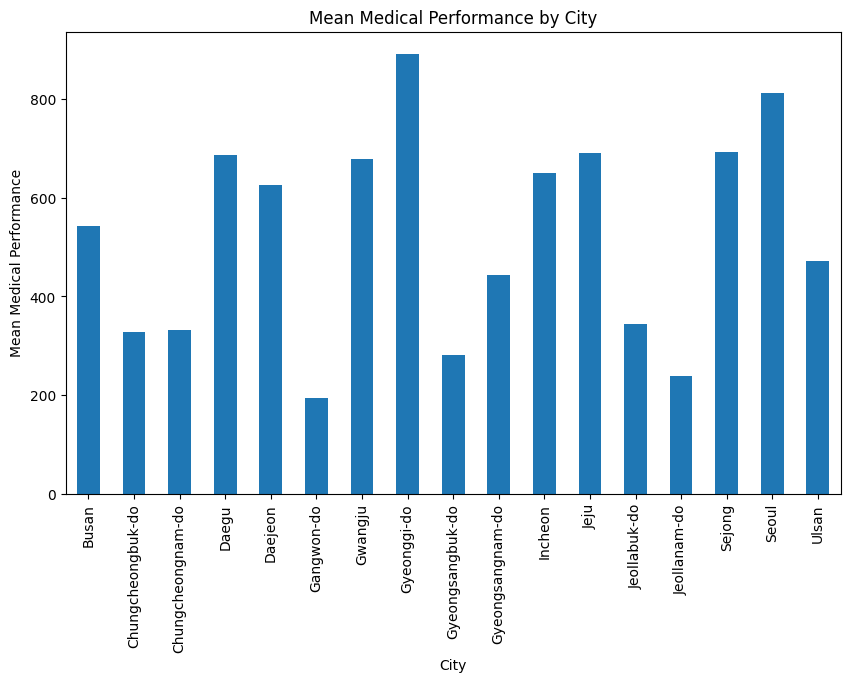

In [15]:
city_means = df.groupby('city')['medical_performance'].mean()

city_means.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Medical Performance by City')
plt.xlabel('City')
plt.ylabel('Mean Medical Performance')
plt.show()

In [16]:
city_means_sorted = city_means.sort_values(ascending=False)

city_means_sorted

,medical_performance
city,
Gyeonggi-do,891.957250
Seoul,811.541969
Sejong,692.440596
Jeju,691.221404
Daegu,687.627790
Gwangju,678.386933
Incheon,649.341509
Daejeon,624.979079
Busan,543.662794


**최댓값, 최솟값, 상/하위 10개 값 확인**

In [17]:
df[df['medical_performance']==df['medical_performance'].max()]

,city,region,medical_performance,urban_rural,pop_density,sex_ratio,avg_age,elderly_pop_rate,econ_activity_rate,avg_household_size,...,subjective_health_rate,healthy_lifestyle_rate,health_checkup_rate,health_insurance_rate,avg_insurance_premium,employment_insurance_rate,doctors_per_thousand,unmet_needs_rate,accessibility_car,accessibility_transport_walk
209,Gyeongsangnam-do,창원시,2336.021689,0,1707.869432,102.6,43.9,16.7,53.553,2.384,...,48.5,35.7,76.827,97.553,113856.4,73.238,2.9,8.3,6.28,14.233


In [18]:
df[df['medical_performance']==df['medical_performance'].min()]

,city,region,medical_performance,urban_rural,pop_density,sex_ratio,avg_age,elderly_pop_rate,econ_activity_rate,avg_household_size,...,subjective_health_rate,healthy_lifestyle_rate,health_checkup_rate,health_insurance_rate,avg_insurance_premium,employment_insurance_rate,doctors_per_thousand,unmet_needs_rate,accessibility_car,accessibility_transport_walk
208,Gyeongsangbuk-do,울릉군,19.570719,0,790.589316,123.8,51.7,27.9,72.394,1.951,...,44.8,37.2,63.527,98.111,90282.0,60.009,2.3,9.3,2.77,8.8


In [19]:
df.iloc[df['medical_performance'].sort_values(ascending=False).index[:10]]

,city,region,medical_performance,urban_rural,pop_density,sex_ratio,avg_age,elderly_pop_rate,econ_activity_rate,avg_household_size,...,subjective_health_rate,healthy_lifestyle_rate,health_checkup_rate,health_insurance_rate,avg_insurance_premium,employment_insurance_rate,doctors_per_thousand,unmet_needs_rate,accessibility_car,accessibility_transport_walk
209,Gyeongsangnam-do,창원시,2336.021689,0,1707.869432,102.6,43.9,16.7,53.553,2.384,...,48.5,35.7,76.827,97.553,113856.4000,73.238,2.9,8.3,6.28,14.233
75,Gyeonggi-do,수원시,2271.382861,1,10041.113160,101.4,41.3,12.4,55.206,2.472,...,46.1,39.3,77.740,68.704,135186.5000,74.887,3.4,5.7,6.26,13.163
84,Gyeonggi-do,고양시,2174.817798,1,5354.824766,95.5,43.6,15.1,54.920,2.489,...,49.2,32.5,75.868,98.166,133363.6667,72.777,3.3,4.8,7.03,15.487
93,Gyeonggi-do,용인시,2013.853412,1,2713.907015,98.5,41.7,14.6,52.701,2.653,...,52.8,36.3,74.960,99.167,151085.3333,76.023,2.0,4.9,7.72,17.573
76,Gyeonggi-do,성남시,1852.538629,1,6379.102992,98.1,43.4,15.7,55.599,2.405,...,54.4,43.4,75.178,98.066,144537.0000,75.206,4.8,3.7,5.58,11.967
79,Gyeonggi-do,부천시,1749.476057,1,15157.006550,98.0,44.1,15.9,54.929,2.543,...,52.1,42.3,75.909,97.872,113346.0000,69.980,3.2,5.2,4.87,10.313
124,Chungcheongbuk-do,청주시,1705.608559,0,2528.376476,102.1,42.0,15.0,56.785,2.346,...,52.6,36.3,79.036,97.689,117578.7500,74.181,2.8,6.8,6.12,17.173
98,Gyeonggi-do,화성시,1648.133448,1,2931.120669,108.3,38.3,9.8,56.148,2.613,...,49.8,40.2,78.071,99.109,146046.0000,79.016,1.9,5.8,7.20,18.087
87,Gyeonggi-do,남양주시,1528.704792,1,2969.544797,98.7,42.8,15.6,51.050,2.618,...,52.1,33.2,73.596,98.102,117658.0000,69.132,1.7,4.7,9.50,17.840
150,Jeollabuk-do,전주시,1499.760475,0,3392.792824,96.7,42.6,16.5,53.162,2.354,...,49.0,37.7,77.427,96.279,111885.0000,72.818,4.1,8.4,7.04,12.760


In [20]:
df.iloc[df['medical_performance'].sort_values(ascending=True).index[:10]]

,city,region,medical_performance,urban_rural,pop_density,sex_ratio,avg_age,elderly_pop_rate,econ_activity_rate,avg_household_size,...,subjective_health_rate,healthy_lifestyle_rate,health_checkup_rate,health_insurance_rate,avg_insurance_premium,employment_insurance_rate,doctors_per_thousand,unmet_needs_rate,accessibility_car,accessibility_transport_walk
208,Gyeongsangbuk-do,울릉군,19.570719,0,790.589316,123.8,51.7,27.9,72.394,1.951,...,44.8,37.2,63.527,98.111,90282.0,60.009,2.3,9.3,2.77,8.800
120,Gangwon-do,양구군,47.990636,0,5612.938005,110.3,46.5,23.7,52.824,2.360,...,51.8,27.4,73.973,95.715,81479.0,68.003,1.8,4.1,30.24,27.670
199,Gyeongsangbuk-do,영양군,48.962533,0,1338.775867,99.7,56.8,40.0,71.741,1.975,...,46.7,22.6,71.078,94.832,72203.0,61.325,1.4,10.4,35.01,48.130
58,Incheon,옹진군,53.997869,1,4858.281889,133.0,51.0,29.6,64.670,1.984,...,42.7,35.3,82.361,97.783,93142.0,60.855,2.8,8.6,36.09,54.895
119,Gangwon-do,화천군,55.769529,0,1704.095672,116.0,47.4,25.3,55.445,2.253,...,53.3,23.7,77.206,96.584,79565.0,67.796,1.7,7.9,25.78,31.835
122,Gangwon-do,고성군,70.038170,0,2183.796147,106.4,50.8,31.2,66.355,2.204,...,54.4,35.5,69.025,96.120,82937.0,59.184,1.0,2.3,16.45,39.500
121,Gangwon-do,인제군,70.057205,0,2082.685267,119.4,46.4,22.6,56.625,2.288,...,50.1,27.4,73.530,97.136,85518.0,68.193,1.1,12.6,26.64,34.860
123,Gangwon-do,양양군,70.183505,0,2208.443994,104.3,53.1,32.4,62.109,2.065,...,58.7,17.7,71.882,95.433,90988.0,60.955,1.0,4.7,15.63,51.537
159,Jeollabuk-do,장수군,71.321462,0,3659.913047,100.9,54.2,36.8,72.370,2.114,...,50.7,21.7,74.057,95.211,75516.0,62.834,1.9,21.3,21.31,59.197
158,Jeollabuk-do,무주군,73.112319,0,1804.862589,99.8,54.3,35.7,67.277,2.070,...,48.5,22.0,74.269,95.902,78032.0,62.946,2.0,5.7,25.64,37.830


지역에 따라 의료실적 차이가 나는 것을 알 수 있음. 이러한 차이에 영향을 미치는 요인을 파악하고자 함

### **2.2. 독립변수와 종속변수 간 상관관계 확인**

1) 지역특성/인구통계학적 변인 & 진료실적

In [21]:
demo_var = ["medical_performance", "urban_rural", "pop_density",
            "sex_ratio", "avg_age", "elderly_pop_rate", "econ_activity_rate",
            "avg_household_size", "grdp", "employment_stability", "income_per_capita",
            "divorce_rate", "foreign_pop_rate", "single_household_rate", "disability_rate", "basic_recipients_rate"]

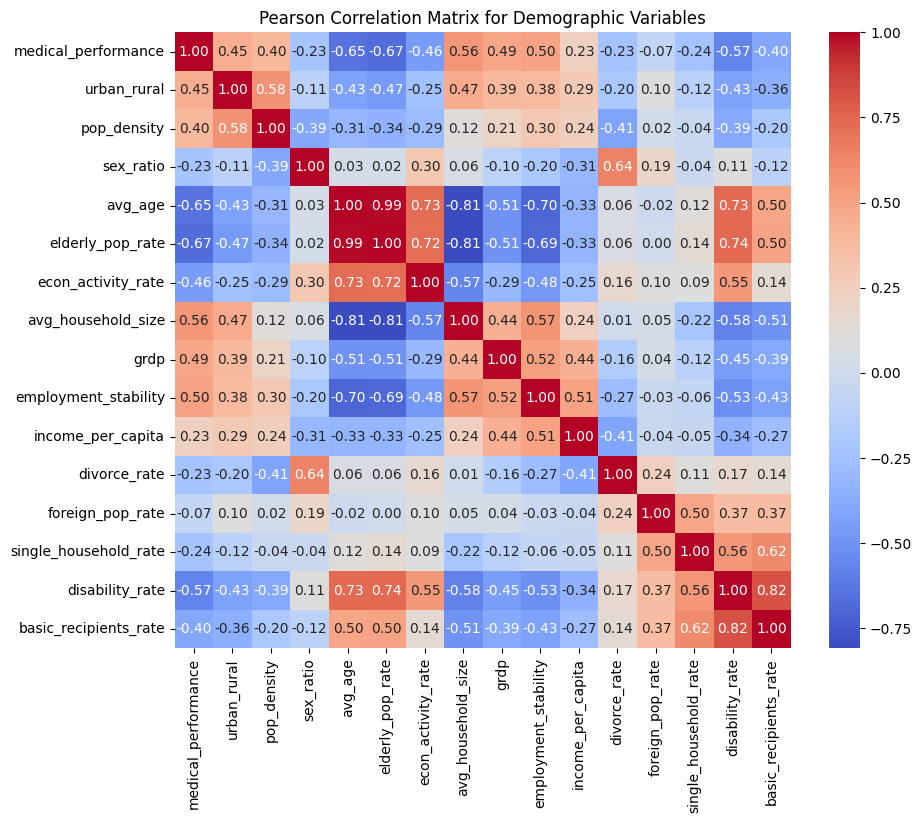

In [22]:
corr_matrix_demo = df[demo_var].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_demo, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
plt.title('Pearson Correlation Matrix for Demographic Variables')
plt.show()

**평균 연령, 고령인구비율, 평균 가구원 수, 고용안정성, 장애인비율**이 절댓값 0.5 이상의 상관관계를 보임

2) 건강/의료서비스 관련 변인 & 진료실적

In [23]:
health_var = ["medical_performance", "health_facilities", "vaccination_rate", "chronic_disease_rate", "subjective_health_rate",
              "healthy_lifestyle_rate", "health_checkup_rate", "health_insurance_rate",
              "avg_insurance_premium", "employment_insurance_rate", "doctors_per_thousand",
              "unmet_needs_rate", "accessibility_car", "accessibility_transport_walk"]

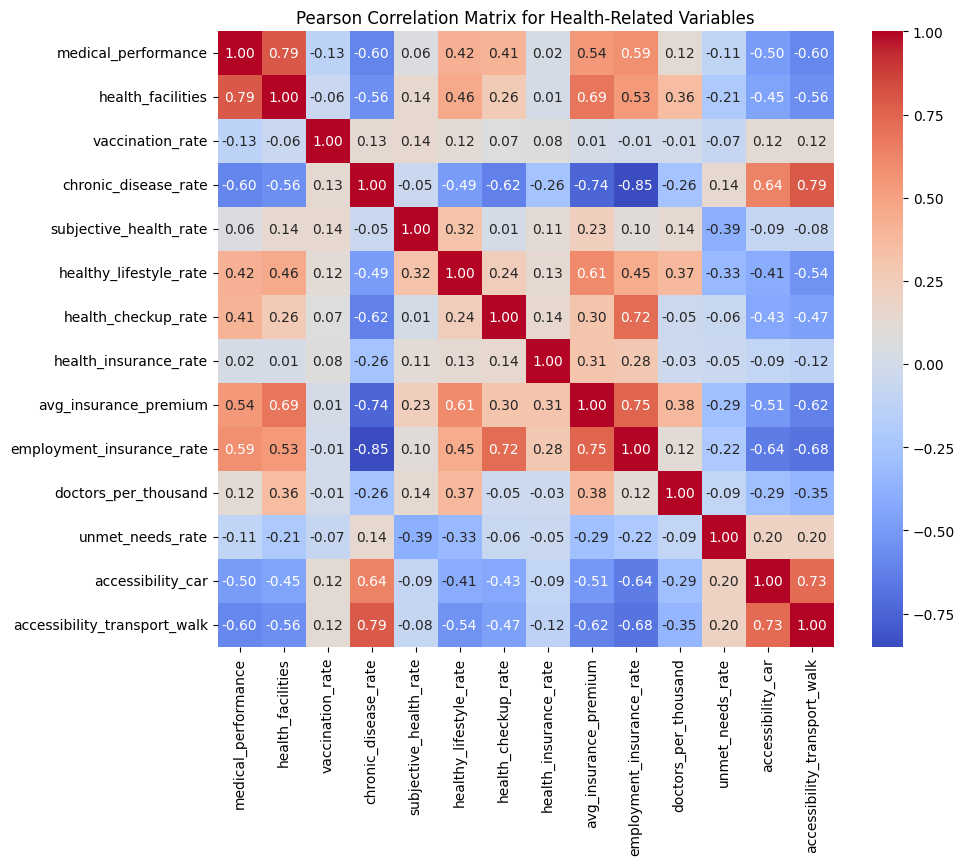

In [24]:
corr_matrix_health = df[health_var].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_health, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
plt.title('Pearson Correlation Matrix for Health-Related Variables')
plt.show()

**의료시설 수, 만성질환 유질환자 비율, 평균 건강보험료, 직장보험 가입률, 승용차를 이용한 의료접근성, 대중교통/도보를 이용한 의료접근성**이 절댓값 0.5 이상의 상관관계를 보임

## **3. 다중회귀분석**

**변수 스케일링**

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scale_columns = ["urban_rural", "pop_density", "sex_ratio", "avg_age", "elderly_pop_rate", "econ_activity_rate",
              "avg_household_size", "grdp", "employment_stability", "income_per_capita",
              "divorce_rate", "foreign_pop_rate", "single_household_rate", "disability_rate",
              "basic_recipients_rate", "health_facilities", "vaccination_rate", "chronic_disease_rate", "subjective_health_rate",
              "healthy_lifestyle_rate", "health_checkup_rate", "health_insurance_rate",
              "avg_insurance_premium", "employment_insurance_rate", "doctors_per_thousand",
              "unmet_needs_rate", "accessibility_car", "accessibility_transport_walk"]
df[scale_columns] = scaler.fit_transform(df[scale_columns])

### **3.1. 모든 변수 활용**

In [26]:
X = df[["urban_rural", "pop_density", "sex_ratio", "avg_age", "elderly_pop_rate", "econ_activity_rate",
        "avg_household_size", "grdp", "employment_stability", "income_per_capita",
        "divorce_rate", "foreign_pop_rate", "single_household_rate", "disability_rate",
        "basic_recipients_rate", "health_facilities", "vaccination_rate", "chronic_disease_rate", "subjective_health_rate",
        "healthy_lifestyle_rate", "health_checkup_rate", "health_insurance_rate",
        "avg_insurance_premium", "employment_insurance_rate", "doctors_per_thousand",
        "unmet_needs_rate", "accessibility_car", "accessibility_transport_walk"]]
y = df["medical_performance"]

In [27]:
import statsmodels.api as sm

X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm).fit()

print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     medical_performance   R-squared:                       0.834
Model:                             OLS   Adj. R-squared:                  0.810
Method:                  Least Squares   F-statistic:                     35.79
Date:                 Sat, 24 Aug 2024   Prob (F-statistic):           4.70e-63
Time:                         13:34:06   Log-Likelihood:                -1516.9
No. Observations:                  229   AIC:                             3092.
Df Residuals:                      200   BIC:                             3191.
Df Model:                           28                                         
Covariance Type:             nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const 

모델의 설명력은 높지만, 유의미한 변수가 4개에 그침. 서로 상관관계가 높은 변수들로 인해 실제로 중요한 변수의 p-값이 높게 산출된 것으로 추측됨

### **3.2. 다중공선성이 높은 변수 제거**

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = df[["pop_density", "sex_ratio", "avg_age", "elderly_pop_rate", "econ_activity_rate",
        "avg_household_size", "grdp", "employment_stability", "income_per_capita",
        "divorce_rate", "foreign_pop_rate", "single_household_rate", "disability_rate",
        "basic_recipients_rate", "health_facilities", "vaccination_rate", "chronic_disease_rate", "subjective_health_rate",
        "healthy_lifestyle_rate", "health_checkup_rate", "health_insurance_rate",
        "avg_insurance_premium", "employment_insurance_rate", "doctors_per_thousand",
        "unmet_needs_rate", "accessibility_car", "accessibility_transport_walk"]]

vif = pd.DataFrame()
vif["features"] = X_vif.columns
vif["VIF Factor"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif.round(1)

,features,VIF Factor
0,pop_density,2.9
1,sex_ratio,3.4
2,avg_age,61.4
3,elderly_pop_rate,71.9
4,econ_activity_rate,4.6
5,avg_household_size,5.2
6,grdp,2.0
7,employment_stability,3.4
8,income_per_capita,6.5
9,divorce_rate,3.4


평균 연령, 고령인구비율, 장애인 비율, 기초수급자 비율, 만성질환 유질환자 비율, 평균 건강보험료, 직장보험 가입률이 10 이상의 VIF 값을 가짐

In [30]:
X_var = df[["pop_density", "sex_ratio", "avg_age", "elderly_pop_rate", "econ_activity_rate",
        "avg_household_size", "grdp", "employment_stability", "income_per_capita",
        "divorce_rate", "foreign_pop_rate", "single_household_rate", "disability_rate",
        "basic_recipients_rate", "health_facilities", "vaccination_rate", "chronic_disease_rate", "subjective_health_rate",
        "healthy_lifestyle_rate", "health_checkup_rate", "health_insurance_rate",
        "avg_insurance_premium", "employment_insurance_rate", "doctors_per_thousand",
        "unmet_needs_rate", "accessibility_car", "accessibility_transport_walk"]]

corr_matrix_X = X_var.corr()

high_corr_pairs = []

for i in range(len(corr_matrix_X.columns)):
    for j in range(i + 1, len(corr_matrix_X.columns)):
        if abs(corr_matrix_X.iloc[i, j]) >= 0.75:
            high_corr_pairs.append((corr_matrix_X.columns[i], corr_matrix_X.columns[j], corr_matrix_X.iloc[i, j]))

for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: Correlation = {pair[2]:.2f}")

avg_age and elderly_pop_rate: Correlation = 0.99
avg_age and avg_household_size: Correlation = -0.81
avg_age and chronic_disease_rate: Correlation = 0.93
avg_age and employment_insurance_rate: Correlation = -0.85
avg_age and accessibility_transport_walk: Correlation = 0.78
elderly_pop_rate and avg_household_size: Correlation = -0.81
elderly_pop_rate and chronic_disease_rate: Correlation = 0.94
elderly_pop_rate and employment_insurance_rate: Correlation = -0.85
elderly_pop_rate and accessibility_transport_walk: Correlation = 0.80
employment_stability and avg_insurance_premium: Correlation = 0.77
income_per_capita and avg_insurance_premium: Correlation = 0.80
disability_rate and basic_recipients_rate: Correlation = 0.82
chronic_disease_rate and employment_insurance_rate: Correlation = -0.85
chronic_disease_rate and accessibility_transport_walk: Correlation = 0.79
avg_insurance_premium and employment_insurance_rate: Correlation = 0.75


In [31]:
X_vif = df[["pop_density", "sex_ratio", "econ_activity_rate",
        "avg_household_size", "grdp", "employment_stability", "income_per_capita",
        "divorce_rate", "foreign_pop_rate", "single_household_rate", "disability_rate",
        "health_facilities", "vaccination_rate", "subjective_health_rate",
        "healthy_lifestyle_rate", "health_checkup_rate", "health_insurance_rate",
        "doctors_per_thousand",
        "unmet_needs_rate", "accessibility_car", "accessibility_transport_walk"]]

vif = pd.DataFrame()
vif["features"] = X_vif.columns
vif["VIF Factor"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif.round(1)

,features,VIF Factor
0,pop_density,2.4
1,sex_ratio,2.8
2,econ_activity_rate,2.9
3,avg_household_size,3.4
4,grdp,1.9
5,employment_stability,2.5
6,income_per_capita,2.3
7,divorce_rate,2.3
8,foreign_pop_rate,1.9
9,single_household_rate,2.2


In [32]:
X = df[["pop_density", "sex_ratio", "econ_activity_rate",
        "avg_household_size", "grdp", "employment_stability", "income_per_capita",
        "divorce_rate", "foreign_pop_rate", "single_household_rate", "disability_rate",
        "health_facilities", "vaccination_rate", "subjective_health_rate",
        "healthy_lifestyle_rate", "health_checkup_rate", "health_insurance_rate",
        "doctors_per_thousand",
        "unmet_needs_rate", "accessibility_car", "accessibility_transport_walk"]]
y = df["medical_performance"]

In [33]:
X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm).fit()

print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     medical_performance   R-squared:                       0.828
Model:                             OLS   Adj. R-squared:                  0.810
Method:                  Least Squares   F-statistic:                     47.35
Date:                 Sat, 24 Aug 2024   Prob (F-statistic):           3.00e-67
Time:                         13:34:07   Log-Likelihood:                -1520.9
No. Observations:                  229   AIC:                             3086.
Df Residuals:                      207   BIC:                             3161.
Df Model:                           21                                         
Covariance Type:             nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const 

모든 변수를 사용했을 때와 동일한 설명력을 보임. 8개의 변수가 0.05 이하의 p-값을 가짐

### **3.3. 변수 선택**

#### **3.3.1. 전진선택법**

In [34]:
# 덮어쓰기

X = df[["urban_rural", "pop_density", "sex_ratio", "avg_age", "elderly_pop_rate", "econ_activity_rate",
        "avg_household_size", "grdp", "employment_stability", "income_per_capita",
        "divorce_rate", "foreign_pop_rate", "single_household_rate", "disability_rate",
        "basic_recipients_rate", "health_facilities", "vaccination_rate", "chronic_disease_rate", "subjective_health_rate",
        "healthy_lifestyle_rate", "health_checkup_rate", "health_insurance_rate",
        "avg_insurance_premium", "employment_insurance_rate", "doctors_per_thousand",
        "unmet_needs_rate", "accessibility_car", "accessibility_transport_walk"]]
y = df["medical_performance"]

In [35]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

sfs_forward = SequentialFeatureSelector(LinearRegression(),
                                        n_features_to_select='auto',
                                        direction='forward',
                                        scoring='r2')

In [36]:
sfs_forward.fit(X, y)

selected_features_forward = X.columns[sfs_forward.get_support()]
selected_features_forward_idx = sfs_forward.get_support(indices=True)

print("Selected features Using Forward Selection:", selected_features_forward)

Selected features Using Forward Selection: Index(['sex_ratio', 'elderly_pop_rate', 'econ_activity_rate',
       'avg_household_size', 'income_per_capita', 'foreign_pop_rate',
       'health_facilities', 'vaccination_rate', 'subjective_health_rate',
       'healthy_lifestyle_rate', 'health_insurance_rate',
       'doctors_per_thousand', 'accessibility_car',
       'accessibility_transport_walk'],
      dtype='object')


In [37]:
X = df[selected_features_forward]
y = df['medical_performance']

X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm).fit()

print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     medical_performance   R-squared:                       0.773
Model:                             OLS   Adj. R-squared:                  0.758
Method:                  Least Squares   F-statistic:                     52.03
Date:                 Sat, 24 Aug 2024   Prob (F-statistic):           7.02e-61
Time:                         13:34:17   Log-Likelihood:                -1552.5
No. Observations:                  229   AIC:                             3135.
Df Residuals:                      214   BIC:                             3186.
Df Model:                           14                                         
Covariance Type:             nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const 

유의미한 변수는 동일하게 8개지만, 설명력이 감소함

#### **3.3.2. 후진제거법**

In [38]:
# 덮어쓰기

X = df[["urban_rural", "pop_density", "sex_ratio", "avg_age", "elderly_pop_rate", "econ_activity_rate",
        "avg_household_size", "grdp", "employment_stability", "income_per_capita",
        "divorce_rate", "foreign_pop_rate", "single_household_rate", "disability_rate",
        "basic_recipients_rate", "health_facilities", "vaccination_rate", "chronic_disease_rate", "subjective_health_rate",
        "healthy_lifestyle_rate", "health_checkup_rate", "health_insurance_rate",
        "avg_insurance_premium", "employment_insurance_rate", "doctors_per_thousand",
        "unmet_needs_rate", "accessibility_car", "accessibility_transport_walk"]]
y = df["medical_performance"]

In [39]:
sfs_backward = SequentialFeatureSelector(LinearRegression(),
                                        n_features_to_select='auto',
                                        direction='backward',
                                        scoring='r2')

In [40]:
sfs_backward.fit(X, y)

selected_features_backward = X.columns[sfs_backward.get_support()]
selected_features_backward_idx = sfs_backward.get_support(indices=True)

print("Selected features Using Backward Selection:", selected_features_backward)

Selected features Using Backward Selection: Index(['pop_density', 'sex_ratio', 'econ_activity_rate', 'income_per_capita',
       'foreign_pop_rate', 'single_household_rate', 'disability_rate',
       'health_facilities', 'vaccination_rate', 'subjective_health_rate',
       'healthy_lifestyle_rate', 'health_checkup_rate', 'doctors_per_thousand',
       'accessibility_car'],
      dtype='object')


In [41]:
X = df[selected_features_backward]
y = df['medical_performance']

X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm).fit()

print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     medical_performance   R-squared:                       0.824
Model:                             OLS   Adj. R-squared:                  0.813
Method:                  Least Squares   F-statistic:                     71.73
Date:                 Sat, 24 Aug 2024   Prob (F-statistic):           1.22e-72
Time:                         13:34:28   Log-Likelihood:                -1523.1
No. Observations:                  229   AIC:                             3076.
Df Residuals:                      214   BIC:                             3128.
Df Model:                           14                                         
Covariance Type:             nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const             

설명력과 유의미한 변수의 개수 모두 증가함

#### **3.3.3. 단계선택법**

In [42]:
# 덮어쓰기

X = df[["urban_rural", "pop_density", "sex_ratio", "avg_age", "elderly_pop_rate", "econ_activity_rate",
        "avg_household_size", "grdp", "employment_stability", "income_per_capita",
        "divorce_rate", "foreign_pop_rate", "single_household_rate", "disability_rate",
        "basic_recipients_rate", "health_facilities", "vaccination_rate", "chronic_disease_rate", "subjective_health_rate",
        "healthy_lifestyle_rate", "health_checkup_rate", "health_insurance_rate",
        "avg_insurance_premium", "employment_insurance_rate", "doctors_per_thousand",
        "unmet_needs_rate", "accessibility_car", "accessibility_transport_walk"]]
y = df["medical_performance"]

In [43]:
def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.01,
                       threshold_out=0.05,
                       verbose=True):

    included = list(initial_list)
    while True:
        changed = False

        # forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print(f'Add {best_feature} with p-value {best_pval}')

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        pvalues = model.pvalues.iloc[1:]  # all coefficients except intercept
        worst_pval = pvalues.max()
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f'Remove {worst_feature} with p-value {worst_pval}')

        if not changed:
            break

    return included

In [44]:
selected_features_stepwise = stepwise_selection(X, y)

print('Selected Features Using Stepwise Selection:', selected_features_stepwise)

Add health_facilities with p-value 2.1331524914180366e-50
Add disability_rate with p-value 1.1304950557642755e-15
Add income_per_capita with p-value 2.508489749339995e-13
Add doctors_per_thousand with p-value 2.7445327305339184e-06
Selected Features Using Stepwise Selection: ['health_facilities', 'disability_rate', 'income_per_capita', 'doctors_per_thousand']


In [45]:
X = df[selected_features_stepwise]
y = df['medical_performance']

X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm).fit()

print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     medical_performance   R-squared:                       0.799
Model:                             OLS   Adj. R-squared:                  0.796
Method:                  Least Squares   F-statistic:                     222.9
Date:                 Sat, 24 Aug 2024   Prob (F-statistic):           7.39e-77
Time:                         13:34:29   Log-Likelihood:                -1538.4
No. Observations:                  229   AIC:                             3087.
Df Residuals:                      224   BIC:                             3104.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

설명력이 가장 낮음

### **3.4. 정규화 회귀 기법**

#### **3.4.1. 라소 회귀**

In [46]:
# 덮어쓰기

X = df[["urban_rural", "pop_density", "sex_ratio", "avg_age", "elderly_pop_rate", "econ_activity_rate",
        "avg_household_size", "grdp", "employment_stability", "income_per_capita",
        "divorce_rate", "foreign_pop_rate", "single_household_rate", "disability_rate",
        "basic_recipients_rate", "health_facilities", "vaccination_rate", "chronic_disease_rate", "subjective_health_rate",
        "healthy_lifestyle_rate", "health_checkup_rate", "health_insurance_rate",
        "avg_insurance_premium", "employment_insurance_rate", "doctors_per_thousand",
        "unmet_needs_rate", "accessibility_car", "accessibility_transport_walk"]]
y = df["medical_performance"]

In [47]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [48]:
# 교차 검증을 통해 최적의 알파 값 찾기
alphas = np.logspace(-4, 0, 50)
lasso_cv_scores = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, random_state=42)
    scores = cross_val_score(lasso, X, y, cv=5, scoring='neg_mean_squared_error')
    lasso_cv_scores.append(np.mean(scores))

# 최적의 알파 값 선택
best_alpha = alphas[np.argmax(lasso_cv_scores)]
print(f"최적의 알파 값: {best_alpha}")

최적의 알파 값: 1.0


In [49]:
# 최적의 알파 값으로 라소 모델 훈련
lasso_best = Lasso(alpha=best_alpha, random_state=42)
lasso_best.fit(X, y)

lasso_coefficients = lasso_best.coef_
print(f"선택된 변수의 계수: {lasso_coefficients}")

선택된 변수의 계수: [  15.72759294  -35.28277953  -39.36576108    4.45084      -0.
   18.75102607   28.42170937   15.24513129    2.36975082  -39.86113433
  -13.16655101   33.98523845  -33.01852006 -168.8776747    -0.
  362.44042384  -25.66395258    7.81623226  -12.44267391   33.18242297
   33.97068877  -10.09916927 -117.37284383   18.13511853  -69.36787531
   16.56821255  -10.94069829   -6.32147472]


In [50]:
# 선택된 유의미한 변수 출력 (계수가 0이 아닌 변수들)
selected_features_lasso = X.columns[lasso_coefficients != 0]
print(f"유의미한 변수들: {selected_features_lasso.tolist()}")

유의미한 변수들: ['urban_rural', 'pop_density', 'sex_ratio', 'avg_age', 'econ_activity_rate', 'avg_household_size', 'grdp', 'employment_stability', 'income_per_capita', 'divorce_rate', 'foreign_pop_rate', 'single_household_rate', 'disability_rate', 'health_facilities', 'vaccination_rate', 'chronic_disease_rate', 'subjective_health_rate', 'healthy_lifestyle_rate', 'health_checkup_rate', 'health_insurance_rate', 'avg_insurance_premium', 'employment_insurance_rate', 'doctors_per_thousand', 'unmet_needs_rate', 'accessibility_car', 'accessibility_transport_walk']


In [51]:
X = df[selected_features_lasso]
y = df['medical_performance']

X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm).fit()

print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     medical_performance   R-squared:                       0.833
Model:                             OLS   Adj. R-squared:                  0.812
Method:                  Least Squares   F-statistic:                     38.84
Date:                 Sat, 24 Aug 2024   Prob (F-statistic):           1.45e-64
Time:                         13:34:33   Log-Likelihood:                -1517.1
No. Observations:                  229   AIC:                             3088.
Df Residuals:                      202   BIC:                             3181.
Df Model:                           26                                         
Covariance Type:             nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const 

설명력은 비슷하나 유의미한 변수가 5개에 그침

#### **3.4.2. 릿지 회귀**

In [52]:
from sklearn.linear_model import Ridge

In [53]:
# 교차 검증을 통해 최적의 알파 값 찾기
alphas = np.logspace(-4, 0, 50)
ridge_cv_scores = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha, random_state=42)
    scores = cross_val_score(ridge, X, y, cv=5, scoring='neg_mean_squared_error')
    ridge_cv_scores.append(np.mean(scores))

# 최적의 알파 값 선택
best_alpha = alphas[np.argmax(ridge_cv_scores)]
print(f"최적의 알파 값: {best_alpha}")

최적의 알파 값: 0.0001


In [54]:
# 최적의 알파 값으로 릿지 모델 훈련
ridge_best = Lasso(alpha=best_alpha, random_state=42)
ridge_best.fit(X, y)

ridge_coefficients = ridge_best.coef_
print(f"선택된 변수의 계수: {lasso_coefficients}")

선택된 변수의 계수: [  15.72759294  -35.28277953  -39.36576108    4.45084      -0.
   18.75102607   28.42170937   15.24513129    2.36975082  -39.86113433
  -13.16655101   33.98523845  -33.01852006 -168.8776747    -0.
  362.44042384  -25.66395258    7.81623226  -12.44267391   33.18242297
   33.97068877  -10.09916927 -117.37284383   18.13511853  -69.36787531
   16.56821255  -10.94069829   -6.32147472]


In [55]:
# 유의미한 변수 (리지 회귀에서는 모든 변수가 사용될 수 있으므로, 계수가 큰 변수를 기준으로 유의미함을 판단)
significant_features_ridge = X.columns[np.abs(ridge_best.coef_) > 0.1]  # 기준값은 임의로 설정

In [56]:
X = df[significant_features_ridge]
y = df['medical_performance']

X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm).fit()

print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     medical_performance   R-squared:                       0.833
Model:                             OLS   Adj. R-squared:                  0.812
Method:                  Least Squares   F-statistic:                     38.84
Date:                 Sat, 24 Aug 2024   Prob (F-statistic):           1.45e-64
Time:                         13:34:36   Log-Likelihood:                -1517.1
No. Observations:                  229   AIC:                             3088.
Df Residuals:                      202   BIC:                             3181.
Df Model:                           26                                         
Covariance Type:             nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const 

마찬가지로 설명력은 비슷하나 유의미한 변수가 5개에 그침 -> 그리고 랏소 회귀는 따로 변수선택 기능이 없어 임의로 선택해야 하는 한계점이 있음

### **3.5. PCA**

In [57]:
X = df[["urban_rural", "pop_density", "sex_ratio", "avg_age", "elderly_pop_rate", "econ_activity_rate",
        "avg_household_size", "grdp", "employment_stability", "income_per_capita",
        "divorce_rate", "foreign_pop_rate", "single_household_rate", "disability_rate",
        "basic_recipients_rate", "health_facilities", "vaccination_rate", "chronic_disease_rate", "subjective_health_rate",
        "healthy_lifestyle_rate", "health_checkup_rate", "health_insurance_rate",
        "avg_insurance_premium", "employment_insurance_rate", "doctors_per_thousand",
        "unmet_needs_rate", "accessibility_car", "accessibility_transport_walk"]]
y = df["medical_performance"]

In [58]:
from sklearn.decomposition import PCA

pca = PCA(random_state=42)
pca.fit(X)

PCA(random_state=42)

In [59]:
# 설명된 분산 비율 확인
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

Text(0, 0.5, 'Cumulative Explained Variance')

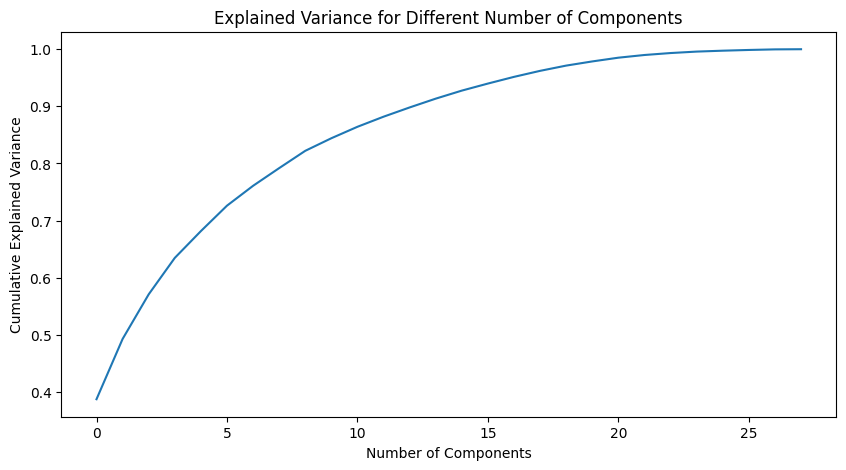

In [60]:
# Explained variance for different number of components
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Explained Variance for Different Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [61]:
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"95%의 분산 설명력이 확보되는 최소 변수 개수: {optimal_components}")

95%의 분산 설명력이 확보되는 최소 변수 개수: 17


In [62]:
# 최적의 주성분 개수를 사용하여 데이터 변환
X_pca = pca.transform(X)[:, :optimal_components]

In [63]:
# 회귀 분석 수행
# PCA 변환 후 데이터프레임으로 변환
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(optimal_components)])

# 상수항 추가 (Intercept)
X_pca_df = sm.add_constant(X_pca_df)

In [64]:
# 회귀 모델 피팅
model_pca = sm.OLS(y, X_pca_df)
model_pca_results = model_pca.fit()

# 결과 요약 출력
print(model_pca_results.summary())

                             OLS Regression Results                            
Dep. Variable:     medical_performance   R-squared:                       0.749
Model:                             OLS   Adj. R-squared:                  0.728
Method:                  Least Squares   F-statistic:                     36.96
Date:                 Sat, 24 Aug 2024   Prob (F-statistic):           9.18e-54
Time:                         13:34:37   Log-Likelihood:                -1564.2
No. Observations:                  229   AIC:                             3164.
Df Residuals:                      211   BIC:                             3226.
Df Model:                           17                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        507.5676     15.418     32.92

낮은 설명력을 보임

**따라서, 후진제거법을 통해 유의미하다고 판별된 10개의 변수를 활용하기로 함.** -> 그러려고 했으나 변수 증발 이슈로 다중공선성을 단순 제거한 모델 사용!

## **4. 의료실적에 따라 상, 중, 하 그룹으로 분류**

In [65]:
# 상위 33%, 중위 34%, 하위 33%로 나누기
df['performance_group'] = pd.qcut(df['medical_performance'], q=3, labels=['Low', 'Medium', 'High'])

In [66]:
df['performance_group'].value_counts()

,count
performance_group,
Low,77
Medium,76
High,76


In [67]:
df[df['performance_group']=='Low'].medical_performance.max()

198.680591

In [68]:
df[df['performance_group']=='Medium'].medical_performance.min()

200.19609599999998

In [69]:
df[df['performance_group']=='Medium'].medical_performance.max()

632.6355219999999

In [70]:
df[df['performance_group']=='High'].medical_performance.min()

633.269581

상, 중, 하로 잘린 기준의 경계점은 촘촘하지만 중 그룹의 최댓값, 최솟값 차이가 큰 것을 미루어 보아 중 그룹의 표준편차가 클 것으로 예상됨

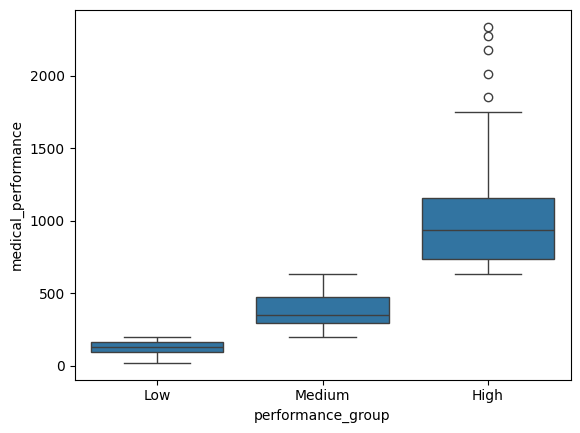

In [71]:
# 그룹별 의료실적 평균 시각화
sns.boxplot(x='performance_group', y='medical_performance', data=df)
plt.show()

In [72]:
df_low = df[df['performance_group']=='Low']
df_medium = df[df['performance_group']=='Medium']
df_high = df[df['performance_group']=='High']

In [73]:
df_low[['city', 'region', 'medical_performance']].sort_values(by='medical_performance')

,city,region,medical_performance
208,Gyeongsangbuk-do,울릉군,19.570719
120,Gangwon-do,양구군,47.990636
199,Gyeongsangbuk-do,영양군,48.962533
58,Incheon,옹진군,53.997869
119,Gangwon-do,화천군,55.769529
...,...,...,...
162,Jeollabuk-do,고창군,194.788084
194,Gyeongsangbuk-do,문경시,196.009397
131,Chungcheongbuk-do,진천군,196.146579
219,Gyeongsangnam-do,창녕군,197.398019


In [74]:
df_low['medical_performance'].describe()

,medical_performance
count,77.000000
mean,124.804251
std,43.600157
min,19.570719
25%,94.734810
50%,125.038261
75%,162.451048
max,198.680591


In [75]:
df_medium[['city', 'region', 'medical_performance']].sort_values(by='medical_performance')

,city,region,medical_performance
174,Jeollanam-do,화순군,200.196096
109,Gangwon-do,동해시,205.525938
144,Chungcheongnam-do,부여군,213.577323
148,Chungcheongnam-do,예산군,220.650728
177,Jeollanam-do,해남군,223.230426
...,...,...,...
164,Jeollanam-do,목포시,598.663464
195,Gyeongsangbuk-do,경산시,603.607218
3,Seoul,성동구,612.090175
80,Gyeonggi-do,광명시,616.940366


In [76]:
df_medium['medical_performance'].describe()

,medical_performance
count,76.000000
mean,381.270000
std,122.206150
min,200.196096
25%,290.789889
50%,347.934158
75%,470.791764
max,632.635522


In [77]:
df_high[['city', 'region', 'medical_performance']].sort_values(by='medical_performance')

,city,region,medical_performance
55,Incheon,계양구,633.269581
92,Gyeonggi-do,하남시,643.040966
70,Ulsan,남구,644.577739
166,Jeollanam-do,순천시,648.371518
67,Daejeon,유성구,651.416479
...,...,...,...
76,Gyeonggi-do,성남시,1852.538629
93,Gyeonggi-do,용인시,2013.853412
84,Gyeonggi-do,고양시,2174.817798
75,Gyeonggi-do,수원시,2271.382861


In [78]:
df_high['medical_performance'].describe()

,medical_performance
count,76.000000
mean,1021.664853
std,397.345020
min,633.269581
25%,732.927030
50%,935.402460
75%,1153.463844
max,2336.021689


### **4.1. 분산분석 (ANOVA)**

In [79]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

anv_model = ols('medical_performance ~ C(performance_group)', data=df).fit()
anv_results = anova_lm(anv_model)

anv_results

,df,sum_sq,mean_sq,F,PR(>F)
C(performance_group),2.0,3.257988e+07,1.628994e+07,280.908588,5.226107e-62
Residual,226.0,1.310578e+07,5.799018e+04,NaN,NaN


## **5. 그룹별 의료실적 분석**

### **5.1. 의료실적이 낮은 그룹**

#### **5.1.1. 클러스터링**

In [80]:
X_low = df_low[["pop_density", "sex_ratio", "econ_activity_rate",
        "avg_household_size", "grdp", "employment_stability", "income_per_capita",
        "divorce_rate", "foreign_pop_rate", "single_household_rate", "disability_rate",
        "health_facilities", "vaccination_rate", "subjective_health_rate",
        "healthy_lifestyle_rate", "health_checkup_rate", "health_insurance_rate",
        "doctors_per_thousand", "unmet_needs_rate", "accessibility_car", "accessibility_transport_walk"]]
y_low = df_low["medical_performance"]

여기에서 독립변수로 쓰인 애들은 앞서 다중공선성이 높은 변수를 제거한 모델에서 가져온 애들!

In [81]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Text(0, 0.5, 'WCSS')

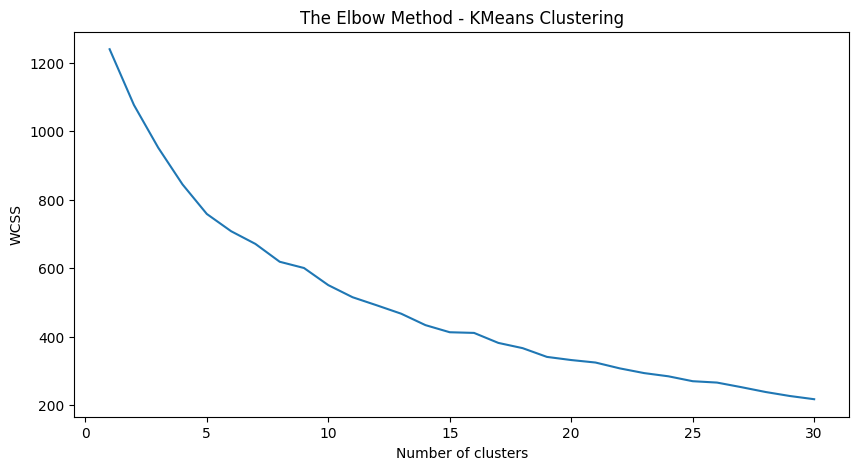

In [82]:
# WCSS(Within-Cluster Sum of Squares)로 엘보우 포인트 찾기

wcss = []
for i in range(1, 31):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_low)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1, 31)
plt.figure(figsize=(10, 5))
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method - KMeans Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

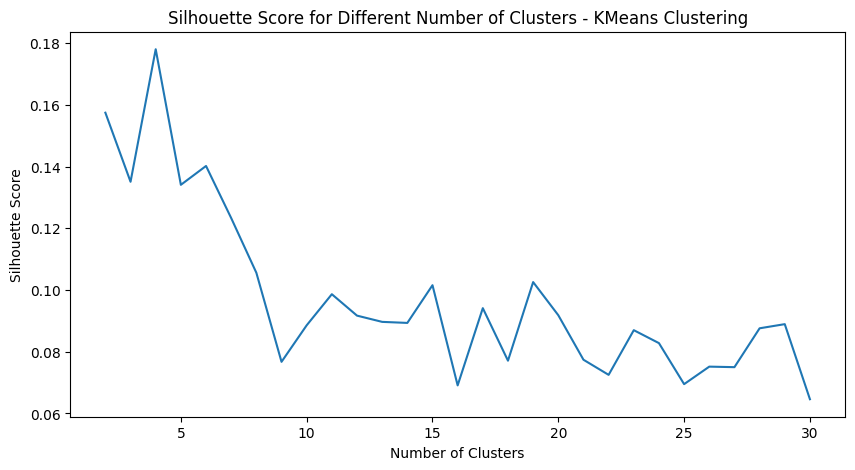

In [83]:
# 실루엣 점수로 최적의 클러스터 수 찾기 (1에 가까울수록 군집화가 잘 된 것)

range_n_clusters = range(2, 31)
silhouette_avg = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
    kmeans.fit(X_low)
    cluster_labels = kmeans.labels_

    silhouette_avg.append(silhouette_score(X_low, cluster_labels))

plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, silhouette_avg)
plt.title('Silhouette Score for Different Number of Clusters - KMeans Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [84]:
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_low)
    cluster_labels = kmeans.labels_
    distortion_avg = kmeans.inertia_
    silhouette_avg = silhouette_score(X_low, cluster_labels)
    print(f"Number of Clusters: {i}, Distortion: {distortion_avg}, Silhouette Score: {silhouette_avg}")

Number of Clusters: 2, Distortion: 1076.3622505112012, Silhouette Score: 0.15744028643046296
Number of Clusters: 3, Distortion: 951.5998853595102, Silhouette Score: 0.1350603970562994
Number of Clusters: 4, Distortion: 844.3657342733687, Silhouette Score: 0.17800671505598842
Number of Clusters: 5, Distortion: 758.0704283033725, Silhouette Score: 0.13407336350337237
Number of Clusters: 6, Distortion: 707.6790938986504, Silhouette Score: 0.14017960344343203
Number of Clusters: 7, Distortion: 670.6087514196361, Silhouette Score: 0.12329879810382396
Number of Clusters: 8, Distortion: 618.4865677186415, Silhouette Score: 0.10558008492419536
Number of Clusters: 9, Distortion: 600.2225348369426, Silhouette Score: 0.07672315134621208
Number of Clusters: 10, Distortion: 550.2609910075354, Silhouette Score: 0.088560696280914


In [85]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans.fit(X_low)

df_low['kmeans_cluster'] = kmeans.labels_

df_low['kmeans_cluster'].value_counts()

,count
kmeans_cluster,
1,49
0,28


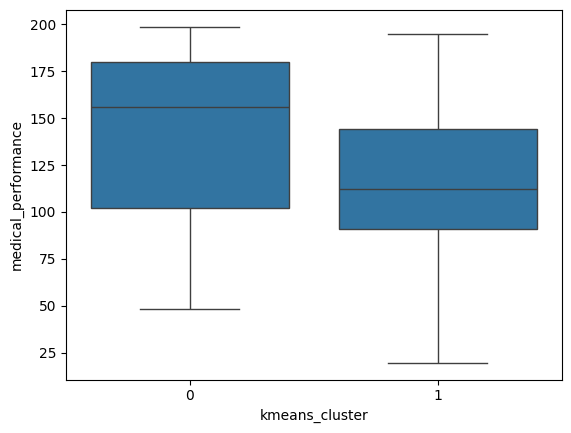

In [86]:
# 군집별 의료실적 평균 시각화
sns.boxplot(x='kmeans_cluster', y='medical_performance', data=df_low)
plt.show()

#### **5.1.2. 의사결정나무**

그렇다면 "클러스터 0"과 "클러스터 1"로 나뉘는 기준은 무엇일지 알아보기 위해 의사결정나무 모델링을 해보자

그냥 df_low 데이터는 X 변수가 전부 스케일링 되어 있기 때문에 의사결정나무 해석이 어려울 수 있어 original_df에서 다시 긁어오기부터!

In [87]:
df_low_original = original_df.iloc[df[df['performance_group']=='Low'].index]
df_low_original.shape

(77, 31)

In [88]:
# kmeans_cluster 컬럼을 미리 생성
df_low_original['kmeans_cluster'] = -1  # 모든 값을 임시로 -1로 설정

df_low_original.loc[df_low[df_low['kmeans_cluster'] == 0].index, 'kmeans_cluster'] = 0
df_low_original.loc[df_low[df_low['kmeans_cluster'] == 1].index, 'kmeans_cluster'] = 1

df_low_original.value_counts('kmeans_cluster')

,count
kmeans_cluster,
1,49
0,28


In [89]:
X_low_original = df_low_original[["pop_density", "sex_ratio", "econ_activity_rate",
        "avg_household_size", "grdp", "employment_stability", "income_per_capita",
        "divorce_rate", "foreign_pop_rate", "single_household_rate", "disability_rate",
        "health_facilities", "vaccination_rate", "subjective_health_rate",
        "healthy_lifestyle_rate", "health_checkup_rate", "health_insurance_rate",
        "doctors_per_thousand", "unmet_needs_rate", "accessibility_car", "accessibility_transport_walk"]]
y_low = df_low_original["kmeans_cluster"]

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree

In [91]:
dtree = DecisionTreeClassifier(random_state=42)

In [92]:
# StratifiedKFold를 사용한 5-겹 교차 검증
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [93]:
# 교차 검증 수행 (정확도 계산)
cross_val_scores = cross_val_score(dtree, X_low_original, y_low, cv=cv, scoring='accuracy')

In [94]:
# 교차 검증 결과 출력
print("Cross-validation accuracy scores:", cross_val_scores)
print("Mean accuracy:", np.mean(cross_val_scores))
print("Standard deviation:", np.std(cross_val_scores))

Cross-validation accuracy scores: [0.8125     0.875      0.8        1.         0.93333333]
Mean accuracy: 0.8841666666666667
Standard deviation: 0.07501851623284599


In [95]:
# 모델 학습
dtree.fit(X_low_original, y_low)

DecisionTreeClassifier(random_state=42)

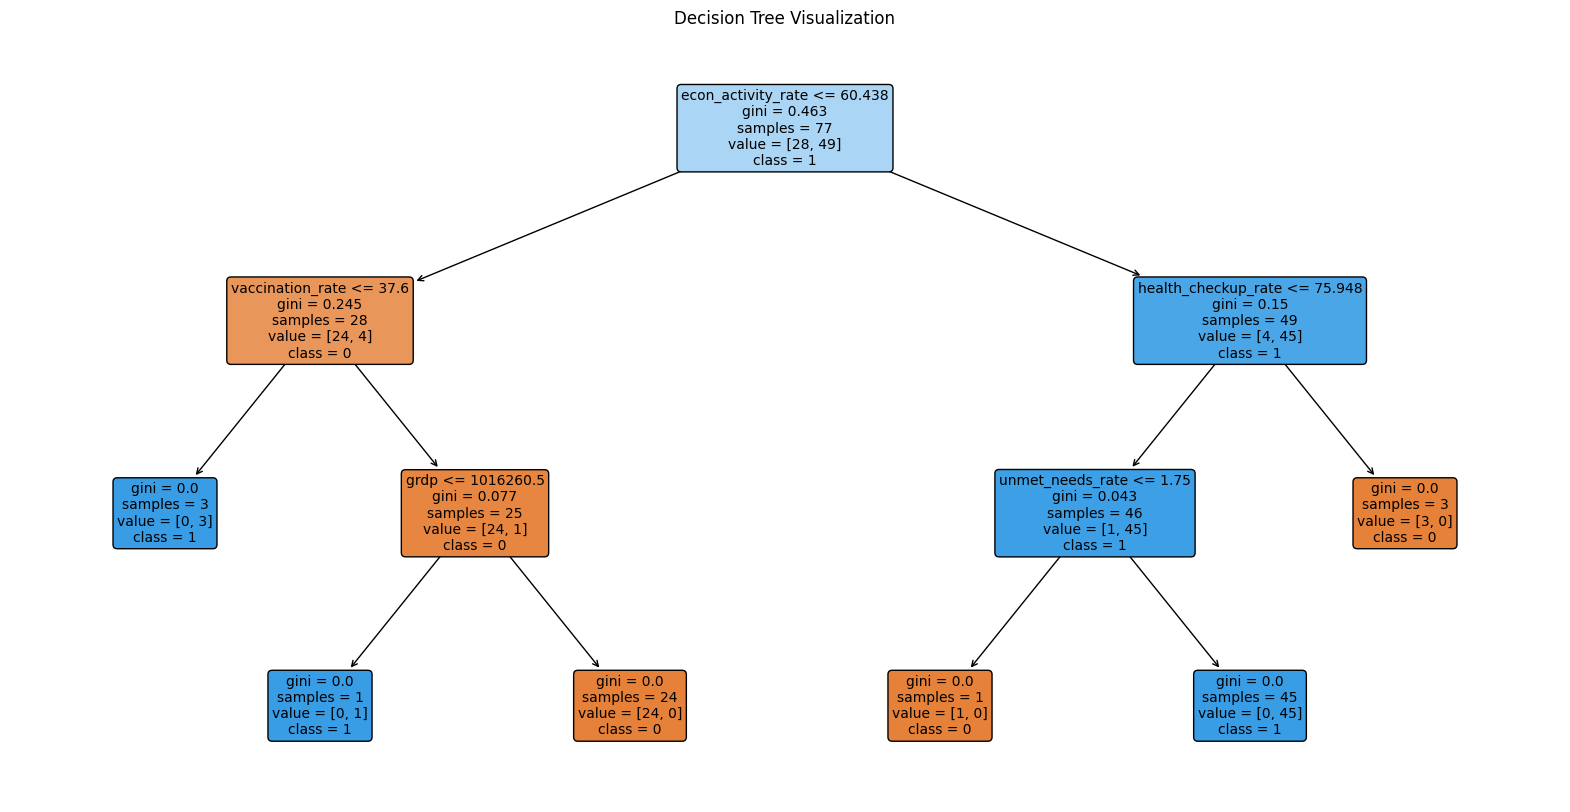

In [96]:
# 의사결정나무 시각화
plt.figure(figsize=(20, 10))
plot_tree(dtree,
          feature_names=X_low_original.columns,
          class_names=["0", "1", "2"],  # 클래스 레이블
          filled=True,  # 노드의 색상을 클래스 레이블에 따라 채우기
          rounded=True,  # 노드 모서리를 둥글게
          fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

In [97]:
# 변수 중요도 추출
importances = dtree.feature_importances_

# 변수 중요도와 변수 이름을 함께 DataFrame으로 변환
importance_df = pd.DataFrame({
    'Feature': X_low_original.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

                         Feature  Importance
2             econ_activity_rate    0.601416
15           health_checkup_rate    0.151262
12              vaccination_rate    0.138542
18              unmet_needs_rate    0.054902
4                           grdp    0.053878
0                    pop_density    0.000000
19             accessibility_car    0.000000
17          doctors_per_thousand    0.000000
16         health_insurance_rate    0.000000
14        healthy_lifestyle_rate    0.000000
13        subjective_health_rate    0.000000
10               disability_rate    0.000000
11             health_facilities    0.000000
1                      sex_ratio    0.000000
9          single_household_rate    0.000000
8               foreign_pop_rate    0.000000
7                   divorce_rate    0.000000
6              income_per_capita    0.000000
5           employment_stability    0.000000
3             avg_household_size    0.000000
20  accessibility_transport_walk    0.000000


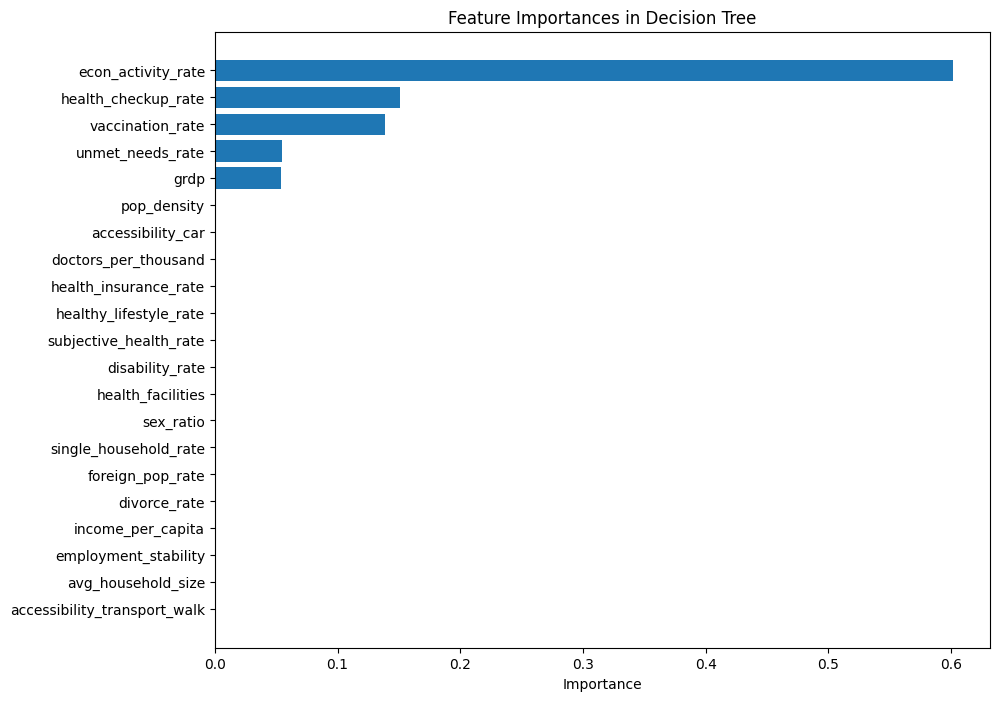

In [98]:
# 변수 중요도 시각화
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances in Decision Tree')
plt.gca().invert_yaxis()
plt.show()

#### **5.1.3. 회귀분석**

In [99]:
X_low = df_low[["econ_activity_rate", "health_checkup_rate", "vaccination_rate", "unmet_needs_rate", "grdp"]]
y_low = df_low["medical_performance"]

X_low_sm = sm.add_constant(X_low)
model_low = sm.OLS(y_low, X_low_sm).fit()

print(model_low.summary())

                             OLS Regression Results                            
Dep. Variable:     medical_performance   R-squared:                       0.435
Model:                             OLS   Adj. R-squared:                  0.396
Method:                  Least Squares   F-statistic:                     10.95
Date:                 Sat, 24 Aug 2024   Prob (F-statistic):           7.84e-08
Time:                         13:34:48   Log-Likelihood:                -377.43
No. Observations:                   77   AIC:                             766.9
Df Residuals:                       71   BIC:                             780.9
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 27

### **5.2. 의료실적이 중간인 그룹**

#### **5.2.1. 클러스터링**

In [100]:
X_medium = df_medium[["pop_density", "sex_ratio", "econ_activity_rate",
        "avg_household_size", "grdp", "employment_stability", "income_per_capita",
        "divorce_rate", "foreign_pop_rate", "single_household_rate", "disability_rate",
        "health_facilities", "vaccination_rate", "subjective_health_rate",
        "healthy_lifestyle_rate", "health_checkup_rate", "health_insurance_rate",
        "doctors_per_thousand", "unmet_needs_rate", "accessibility_car", "accessibility_transport_walk"]]
y_medium = df_medium["medical_performance"]

Text(0, 0.5, 'WCSS')

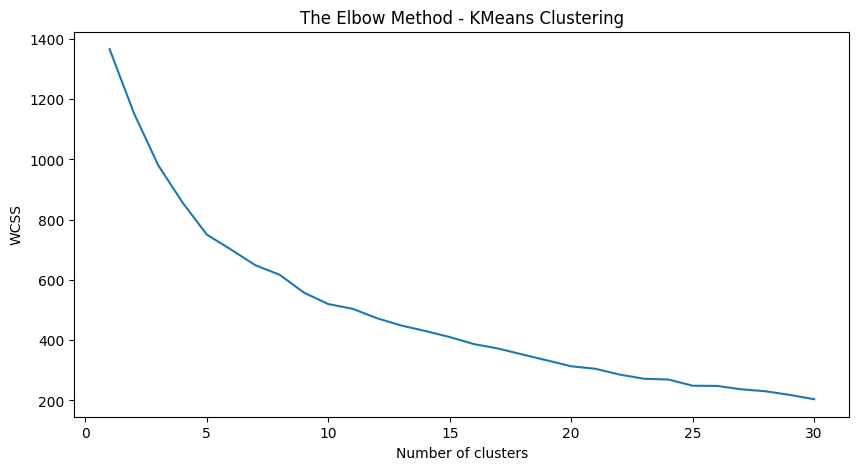

In [101]:
# WCSS(Within-Cluster Sum of Squares)로 엘보우 포인트 찾기

wcss = []
for i in range(1, 31):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_medium)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1, 31)
plt.figure(figsize=(10, 5))
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method - KMeans Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

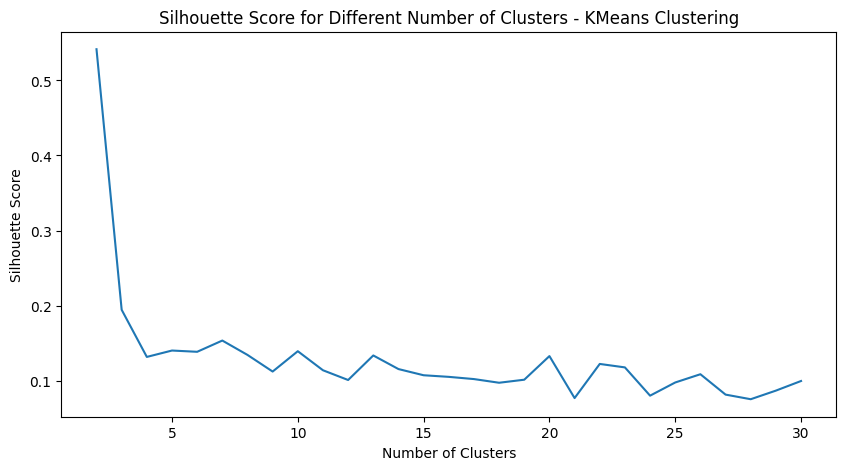

In [102]:
# 실루엣 점수로 최적의 클러스터 수 찾기 (1에 가까울수록 군집화가 잘 된 것)

range_n_clusters = range(2, 31)
silhouette_avg = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
    kmeans.fit(X_medium)
    cluster_labels = kmeans.labels_

    silhouette_avg.append(silhouette_score(X_medium, cluster_labels))

plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, silhouette_avg)
plt.title('Silhouette Score for Different Number of Clusters - KMeans Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [103]:
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_medium)
    cluster_labels = kmeans.labels_
    distortion_avg = kmeans.inertia_
    silhouette_avg = silhouette_score(X_medium, cluster_labels)
    print(f"Number of Clusters: {i}, Distortion: {distortion_avg}, Silhouette Score: {silhouette_avg}")

Number of Clusters: 2, Distortion: 1153.466891681592, Silhouette Score: 0.5415465905949707
Number of Clusters: 3, Distortion: 980.7573273774084, Silhouette Score: 0.1944660523170895
Number of Clusters: 4, Distortion: 857.0494018470471, Silhouette Score: 0.13168803642127916
Number of Clusters: 5, Distortion: 750.3972610943683, Silhouette Score: 0.14019881402316192
Number of Clusters: 6, Distortion: 700.5791029599299, Silhouette Score: 0.13851209857621286
Number of Clusters: 7, Distortion: 648.5925401556929, Silhouette Score: 0.15349162112773254
Number of Clusters: 8, Distortion: 617.0769480562801, Silhouette Score: 0.1343690482605687
Number of Clusters: 9, Distortion: 557.6522491019807, Silhouette Score: 0.11220375844882623
Number of Clusters: 10, Distortion: 519.8836714830185, Silhouette Score: 0.1392980242884334


In [104]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X_medium)

df_medium['kmeans_cluster'] = kmeans.labels_

df_medium['kmeans_cluster'].value_counts()

,count
kmeans_cluster,
1,54
0,20
2,2


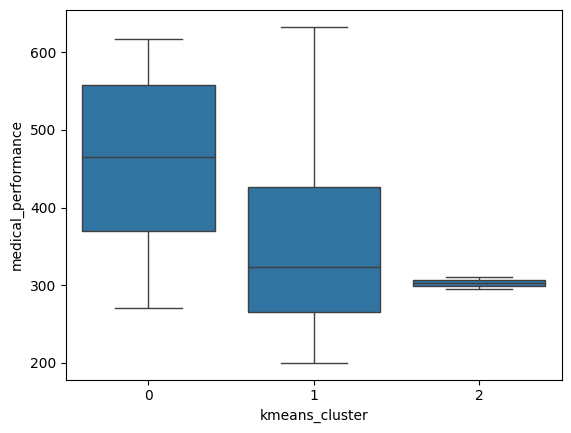

In [105]:
# 군집별 의료실적 평균 시각화
sns.boxplot(x='kmeans_cluster', y='medical_performance', data=df_medium)
plt.show()

In [106]:
anv_model = ols('medical_performance ~ C(kmeans_cluster)', data=df_medium).fit()
anv_results = anova_lm(anv_model)

anv_results

,df,sum_sq,mean_sq,F,PR(>F)
C(kmeans_cluster),2.0,163723.590343,81861.795171,6.248651,0.003126
Residual,73.0,956352.140177,13100.714249,NaN,NaN


In [107]:
df_medium[df_medium['kmeans_cluster']==0].medical_performance.describe()

,medical_performance
count,20.000000
mean,457.620366
std,117.368783
min,270.324592
25%,369.336958
50%,465.620681
75%,558.098062
max,616.940366


In [108]:
df_medium[df_medium['kmeans_cluster']==1].medical_performance.describe()

,medical_performance
count,54.000000
mean,355.908838
std,114.471532
min,200.196096
25%,265.435608
50%,323.977322
75%,426.972645
max,632.635522


In [109]:
df_medium[df_medium['kmeans_cluster']==2].medical_performance.describe()

,medical_performance
count,2.000000
mean,302.517726
std,11.007913
min,294.733956
25%,298.625841
50%,302.517726
75%,306.409611
max,310.301496


#### **5.2.2. 의사결정나무**

In [110]:
df_medium_original = original_df.iloc[df[df['performance_group']=='Medium'].index]
df_medium_original.shape

(76, 31)

In [111]:
# kmeans_cluster 컬럼을 미리 생성
df_medium_original['kmeans_cluster'] = -1  # 모든 값을 임시로 -1로 설정

df_medium_original.loc[df_medium[df_medium['kmeans_cluster'] == 0].index, 'kmeans_cluster'] = 0
df_medium_original.loc[df_medium[df_medium['kmeans_cluster'] == 1].index, 'kmeans_cluster'] = 1
df_medium_original.loc[df_medium[df_medium['kmeans_cluster'] == 2].index, 'kmeans_cluster'] = 2

df_medium_original.value_counts('kmeans_cluster')

,count
kmeans_cluster,
1,54
0,20
2,2


In [112]:
X_medium_original = df_medium_original[["pop_density", "sex_ratio", "econ_activity_rate",
        "avg_household_size", "grdp", "employment_stability", "income_per_capita",
        "divorce_rate", "foreign_pop_rate", "single_household_rate", "disability_rate",
        "health_facilities", "vaccination_rate", "subjective_health_rate",
        "healthy_lifestyle_rate", "health_checkup_rate", "health_insurance_rate",
        "doctors_per_thousand", "unmet_needs_rate", "accessibility_car", "accessibility_transport_walk"]]
y_medium = df_medium_original["kmeans_cluster"]

In [113]:
dtree = DecisionTreeClassifier(random_state=42)

In [114]:
# StratifiedKFold를 사용한 5-겹 교차 검증
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [115]:
# 교차 검증 수행 (정확도 계산)
cross_val_scores = cross_val_score(dtree, X_medium_original, y_medium, cv=cv, scoring='accuracy')

In [116]:
# 교차 검증 결과 출력
print("Cross-validation accuracy scores:", cross_val_scores)
print("Mean accuracy:", np.mean(cross_val_scores))
print("Standard deviation:", np.std(cross_val_scores))

Cross-validation accuracy scores: [0.6875     0.8        0.93333333 1.         0.73333333]
Mean accuracy: 0.8308333333333333
Standard deviation: 0.11842719282327012


In [117]:
# 모델 학습
dtree.fit(X_medium_original, y_medium)

DecisionTreeClassifier(random_state=42)

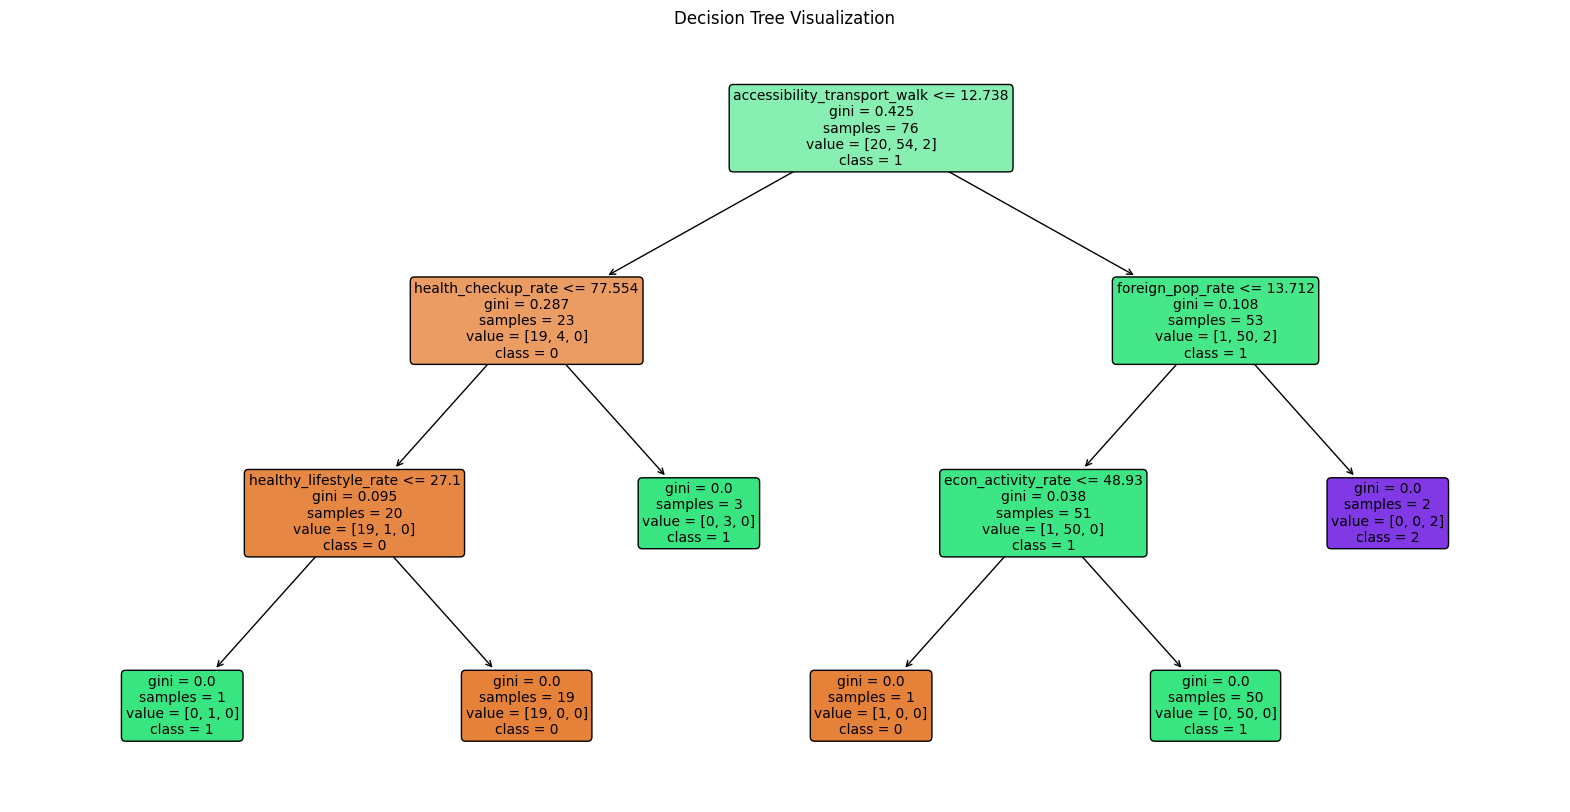

In [118]:
# 의사결정나무 시각화
plt.figure(figsize=(20, 10))
plot_tree(dtree,
          feature_names=X_medium_original.columns,  # 변수명
          class_names=["0", "1", "2"],  # 클래스 레이블
          filled=True,  # 노드의 색상을 클래스 레이블에 따라 채우기
          rounded=True,  # 노드 모서리를 둥글게.
          fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

In [119]:
# 변수 중요도 추출
importances = dtree.feature_importances_

# 변수 중요도와 변수 이름을 함께 DataFrame으로 변환
importance_df = pd.DataFrame({
    'Feature': X_medium.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

                         Feature  Importance
20  accessibility_transport_walk    0.618003
15           health_checkup_rate    0.145709
8               foreign_pop_rate    0.116818
2             econ_activity_rate    0.060676
14        healthy_lifestyle_rate    0.058795
12              vaccination_rate    0.000000
19             accessibility_car    0.000000
18              unmet_needs_rate    0.000000
17          doctors_per_thousand    0.000000
16         health_insurance_rate    0.000000
13        subjective_health_rate    0.000000
0                    pop_density    0.000000
11             health_facilities    0.000000
1                      sex_ratio    0.000000
9          single_household_rate    0.000000
7                   divorce_rate    0.000000
6              income_per_capita    0.000000
5           employment_stability    0.000000
4                           grdp    0.000000
3             avg_household_size    0.000000
10               disability_rate    0.000000


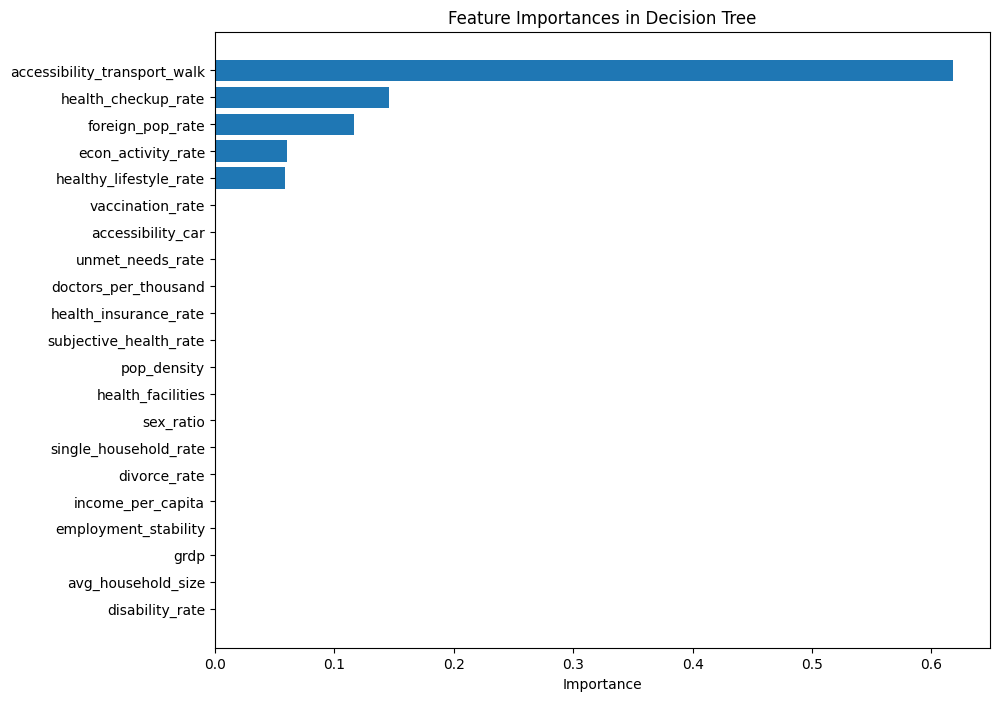

In [120]:
# 변수 중요도 시각화
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances in Decision Tree')
plt.gca().invert_yaxis()
plt.show()

#### **5.2.3. 회귀분석**

In [121]:
X_medium = df_medium[["accessibility_transport_walk", "health_checkup_rate", "foreign_pop_rate", "econ_activity_rate", "healthy_lifestyle_rate"]]
y_medium = df_medium["medical_performance"]

X_medium_sm = sm.add_constant(X_medium)
model_medium = sm.OLS(y_medium, X_medium_sm).fit()

print(model_medium.summary())

                             OLS Regression Results                            
Dep. Variable:     medical_performance   R-squared:                       0.357
Model:                             OLS   Adj. R-squared:                  0.311
Method:                  Least Squares   F-statistic:                     7.775
Date:                 Sat, 24 Aug 2024   Prob (F-statistic):           7.29e-06
Time:                         13:34:56   Log-Likelihood:                -455.79
No. Observations:                   76   AIC:                             923.6
Df Residuals:                       70   BIC:                             937.6
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const 

### **5.3. 의료실적이 높은 그룹**

#### **5.3.1. 클러스터링**

In [122]:
X_high = df_high[["pop_density", "sex_ratio", "econ_activity_rate",
        "avg_household_size", "grdp", "employment_stability", "income_per_capita",
        "divorce_rate", "foreign_pop_rate", "single_household_rate", "disability_rate",
        "health_facilities", "vaccination_rate", "subjective_health_rate",
        "healthy_lifestyle_rate", "health_checkup_rate", "health_insurance_rate",
        "doctors_per_thousand", "unmet_needs_rate", "accessibility_car", "accessibility_transport_walk"]]
y_high = df_high["medical_performance"]

Text(0, 0.5, 'WCSS')

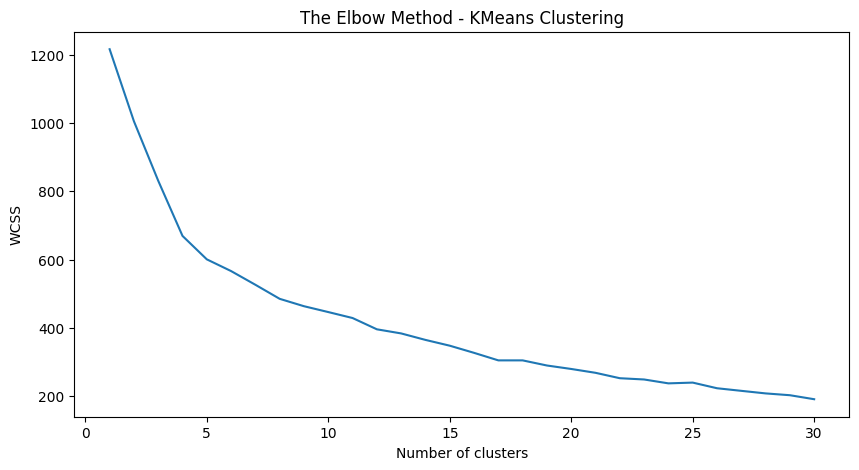

In [123]:
# WCSS(Within-Cluster Sum of Squares)로 엘보우 포인트 찾기

wcss = []
for i in range(1, 31):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_high)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1, 31)
plt.figure(figsize=(10, 5))
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method - KMeans Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

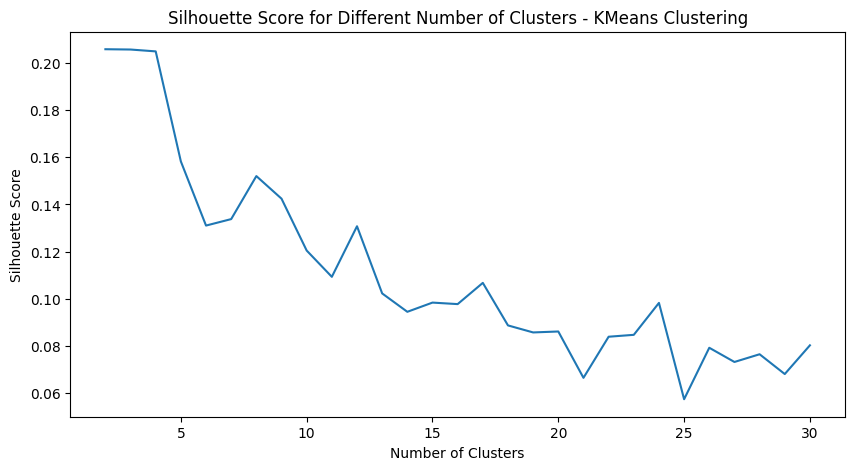

In [124]:
# 실루엣 점수로 최적의 클러스터 수 찾기 (1에 가까울수록 군집화가 잘 된 것)

range_n_clusters = range(2, 31)
silhouette_avg = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
    kmeans.fit(X_high)
    cluster_labels = kmeans.labels_

    silhouette_avg.append(silhouette_score(X_high, cluster_labels))

plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, silhouette_avg)
plt.title('Silhouette Score for Different Number of Clusters - KMeans Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [125]:
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_low)
    cluster_labels = kmeans.labels_
    distortion_avg = kmeans.inertia_
    silhouette_avg = silhouette_score(X_low, cluster_labels)
    print(f"Number of Clusters: {i}, Distortion: {distortion_avg}, Silhouette Score: {silhouette_avg}")

Number of Clusters: 2, Distortion: 263.6233005488484, Silhouette Score: 0.2308146438727158
Number of Clusters: 3, Distortion: 213.48749886049623, Silhouette Score: 0.2184234566973893
Number of Clusters: 4, Distortion: 186.61999343762346, Silhouette Score: 0.21278066186009084
Number of Clusters: 5, Distortion: 167.68575769564498, Silhouette Score: 0.2058449706723186
Number of Clusters: 6, Distortion: 149.17439020376344, Silhouette Score: 0.21084648450056287
Number of Clusters: 7, Distortion: 134.35687568756487, Silhouette Score: 0.1971054051582646
Number of Clusters: 8, Distortion: 124.09737800180207, Silhouette Score: 0.20399161570194918
Number of Clusters: 9, Distortion: 115.11494971328175, Silhouette Score: 0.22463786490486076
Number of Clusters: 10, Distortion: 107.63182835023248, Silhouette Score: 0.19690096339890503


In [126]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans.fit(X_high)

df_high['kmeans_cluster'] = kmeans.labels_

df_high['kmeans_cluster'].value_counts()

,count
kmeans_cluster,
0,47
1,29


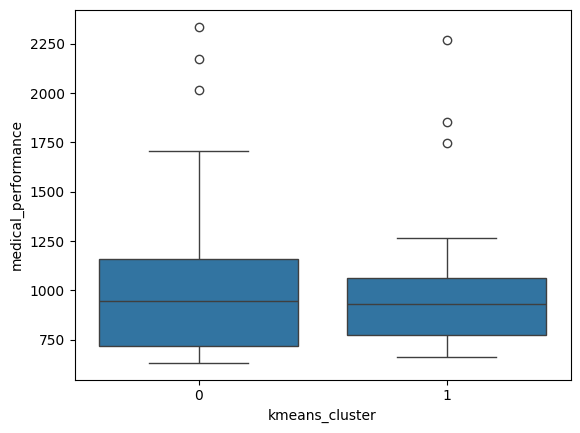

In [127]:
# 군집별 의료실적 평균 시각화
sns.boxplot(x='kmeans_cluster', y='medical_performance', data=df_high)
plt.show()

##### **5.3.1.1. 이상치 분석**

In [128]:
# IQR을 사용한 이상치 탐지
Q1 = df_high['medical_performance'].quantile(0.25)
Q3 = df_high['medical_performance'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 식별
outliers = df_high[(df_high['medical_performance'] < (Q1 - 1.5 * IQR)) |
                   (df_high['medical_performance'] > (Q3 + 1.5 * IQR))]

# 결과 확인
outliers

,city,region,medical_performance,urban_rural,pop_density,sex_ratio,avg_age,elderly_pop_rate,econ_activity_rate,avg_household_size,...,health_checkup_rate,health_insurance_rate,avg_insurance_premium,employment_insurance_rate,doctors_per_thousand,unmet_needs_rate,accessibility_car,accessibility_transport_walk,performance_group,kmeans_cluster
75,Gyeonggi-do,수원시,2271.382861,1.571527,1.011665,0.135328,-1.215945,-1.318984,-0.297425,1.072937,...,1.130666,-12.191043,1.141039,1.293091,0.211826,-0.096049,-0.620979,-0.823216,High,1
76,Gyeonggi-do,성남시,1852.538629,1.571527,0.310548,-0.415385,-0.792399,-0.946142,-0.226884,0.696317,...,0.364620,0.761080,1.501323,1.352751,0.795761,-0.746794,-0.710153,-0.894951,High,1
84,Gyeonggi-do,고양시,2174.817798,1.571527,0.114443,-0.849279,-0.752061,-1.013932,-0.348760,1.168497,...,0.570932,0.805192,1.070804,0.898474,0.170117,-0.388884,-0.520003,-0.683823,High,0
93,Gyeonggi-do,용인시,2013.853412,1.571527,-0.391178,-0.348632,-1.135270,-1.070423,-0.747057,2.090374,...,0.299438,1.246751,1.753637,1.505548,-0.372108,-0.356347,-0.429518,-0.558706,High,0
209,Gyeongsangnam-do,창원시,2336.021689,-0.636324,-0.583791,0.335587,-0.691555,-0.833160,-0.594128,0.578272,...,0.857676,0.534786,0.319170,0.984691,0.003278,0.749920,-0.618356,-0.759038,High,0


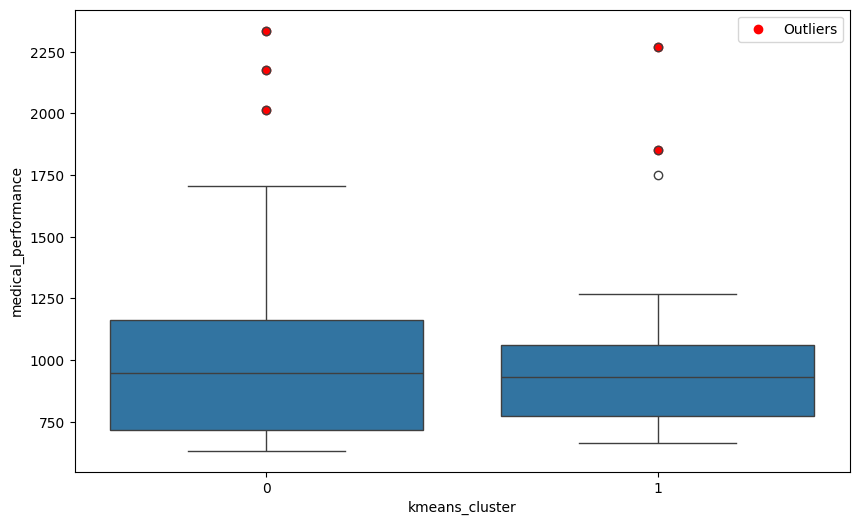

In [129]:
# 이상치와 정상 데이터를 구분해서 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='kmeans_cluster', y='medical_performance', data=df_high)
plt.scatter(x=outliers['kmeans_cluster'], y=outliers['medical_performance'], color='red', label='Outliers')
plt.legend()
plt.show()

In [130]:
df_high_original = original_df.iloc[df[df['performance_group']=='High'].index]
df_high_original.shape

(76, 31)

In [131]:
x_vars_1 = ["sex_ratio", "econ_activity_rate",
            "avg_household_size", "employment_stability","divorce_rate", "foreign_pop_rate", "single_household_rate", ]

normal_data = df_high_original[~df_high.index.isin(outliers.index)]
outliers_data = df_high_original[df_high.index.isin(outliers.index)]

normal_means = normal_data[x_vars_1].mean()
outliers_means = outliers_data[x_vars_1].mean()

In [132]:
# 데이터프레임 생성
comparison_df = pd.DataFrame({
    'Variable': x_vars_1,
    'Normal Mean': normal_means.values,
    'Outliers Mean': outliers_means.values
})

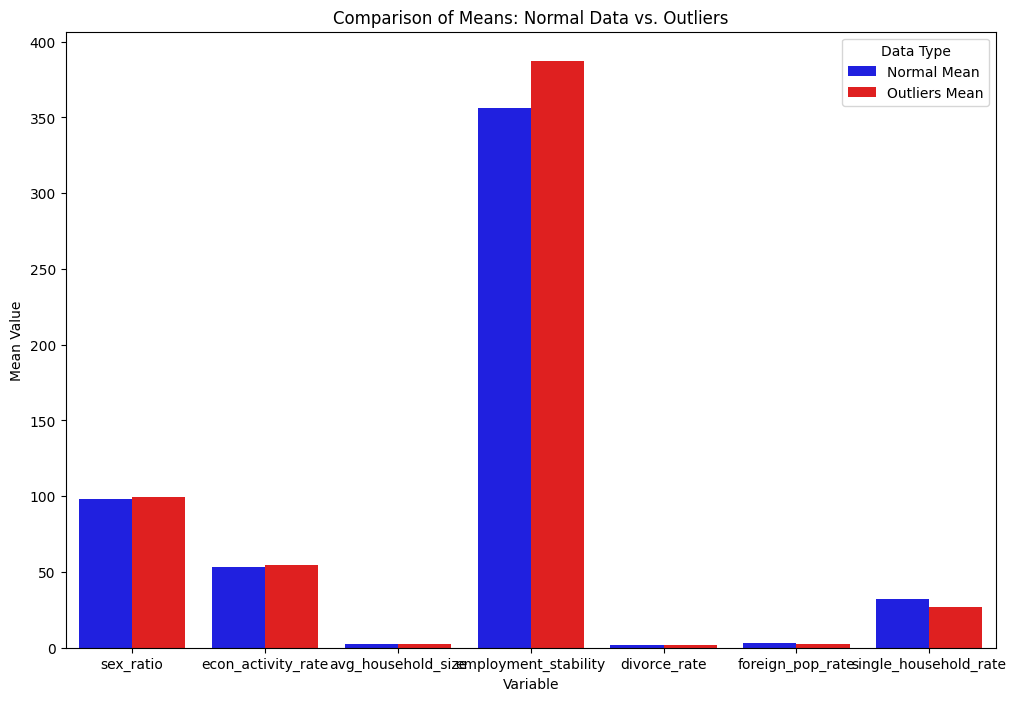

In [133]:
# 데이터프레임을 길게 변환 (Long format)
comparison_long_df = comparison_df.melt(id_vars='Variable', var_name='Type', value_name='Mean')

plt.figure(figsize=(12, 8))
sns.barplot(data=comparison_long_df, x='Variable', y='Mean', hue='Type', palette={'Normal Mean': 'blue', 'Outliers Mean': 'red'})
plt.title('Comparison of Means: Normal Data vs. Outliers')
plt.xlabel('Variable')
plt.ylabel('Mean Value')
plt.legend(title='Data Type')
plt.show()

In [134]:
x_vars_2 = ["disability_rate", "health_facilities", "vaccination_rate", "subjective_health_rate",
        "healthy_lifestyle_rate", "health_checkup_rate", "health_insurance_rate",
        "unmet_needs_rate", "accessibility_car", "accessibility_transport_walk"]

normal_data = df_high_original[~df_high.index.isin(outliers.index)]
outliers_data = df_high_original[df_high.index.isin(outliers.index)]

normal_means = normal_data[x_vars_2].mean()
outliers_means = outliers_data[x_vars_2].mean()

In [135]:
# 데이터프레임 생성
comparison_df = pd.DataFrame({
    'Variable': x_vars_2,
    'Normal Mean': normal_means.values,
    'Outliers Mean': outliers_means.values
})

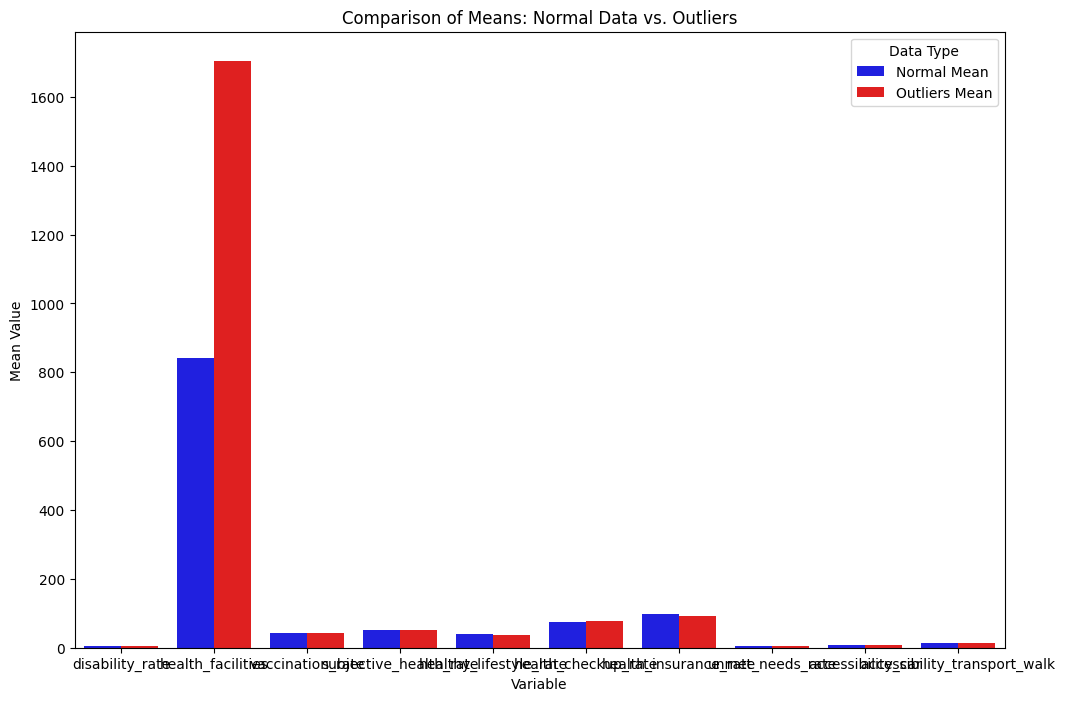

In [136]:
# 데이터프레임을 길게 변환 (Long format)
comparison_long_df = comparison_df.melt(id_vars='Variable', var_name='Type', value_name='Mean')

plt.figure(figsize=(12, 8))
sns.barplot(data=comparison_long_df, x='Variable', y='Mean', hue='Type', palette={'Normal Mean': 'blue', 'Outliers Mean': 'red'})
plt.title('Comparison of Means: Normal Data vs. Outliers')
plt.xlabel('Variable')
plt.ylabel('Mean Value')
plt.legend(title='Data Type')
plt.show()

#### **5.3.2. 의사결정나무**

In [137]:
df_high_original = original_df.iloc[df[df['performance_group']=='High'].index]
df_high_original.shape

(76, 31)

In [138]:
# kmeans_cluster 컬럼을 미리 생성
df_high_original['kmeans_cluster'] = -1  # 모든 값을 임시로 -1로 설정

df_high_original.loc[df_high[df_high['kmeans_cluster'] == 0].index, 'kmeans_cluster'] = 0
df_high_original.loc[df_high[df_high['kmeans_cluster'] == 1].index, 'kmeans_cluster'] = 1

df_high_original.value_counts('kmeans_cluster')

,count
kmeans_cluster,
0,47
1,29


In [139]:
X_high_original = df_high_original[["pop_density", "sex_ratio", "econ_activity_rate",
        "avg_household_size", "grdp", "employment_stability", "income_per_capita",
        "divorce_rate", "foreign_pop_rate", "single_household_rate", "disability_rate",
        "health_facilities", "vaccination_rate", "subjective_health_rate",
        "healthy_lifestyle_rate", "health_checkup_rate", "health_insurance_rate",
        "doctors_per_thousand", "unmet_needs_rate", "accessibility_car", "accessibility_transport_walk"]]
y_high = df_high_original["kmeans_cluster"]

In [140]:
dtree = DecisionTreeClassifier(random_state=42)

In [141]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [142]:
cross_val_scores = cross_val_score(dtree, X_high_original, y_high, cv=cv, scoring='accuracy')

In [143]:
print("Cross-validation accuracy scores:", cross_val_scores)
print("Mean accuracy:", np.mean(cross_val_scores))
print("Standard deviation:", np.std(cross_val_scores))

Cross-validation accuracy scores: [1.         0.93333333 0.8        0.8        0.86666667]
Mean accuracy: 0.8800000000000001
Standard deviation: 0.07774602526460399


In [144]:
dtree.fit(X_high_original, y_high)

DecisionTreeClassifier(random_state=42)

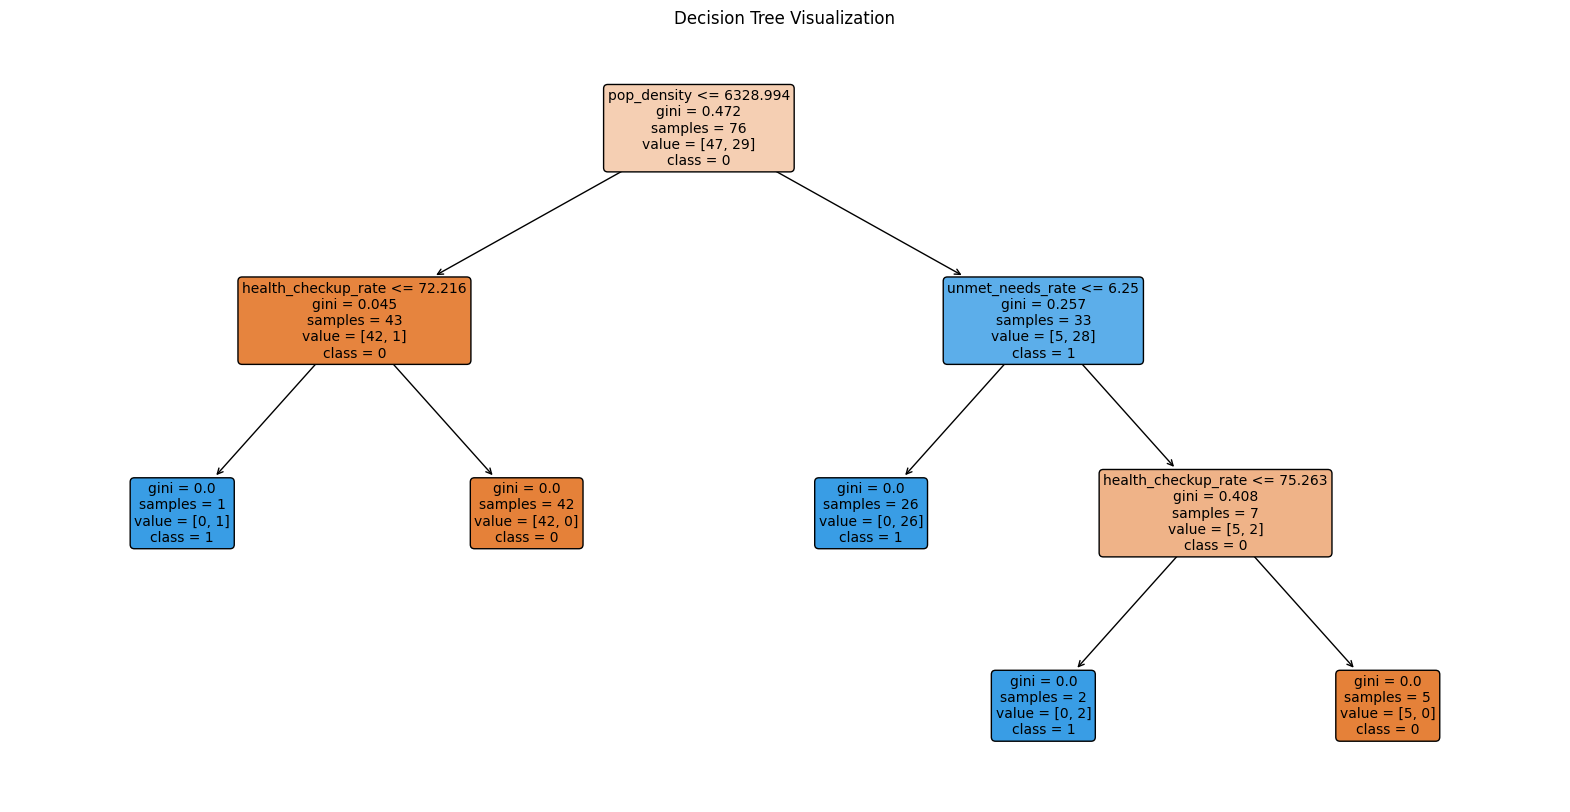

In [145]:
# 의사결정나무 시각화
plt.figure(figsize=(20, 10))
plot_tree(dtree,
          feature_names=X_high_original.columns,  # 변수명
          class_names=["0", "1"],  # 클래스 레이블
          filled=True,  # 노드의 색상을 클래스 레이블에 따라 채우기
          rounded=True,  # 노드 모서리를 둥글게
          fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

In [146]:
# 변수 중요도 추출
importances = dtree.feature_importances_

# 변수 중요도와 변수 이름을 함께 DataFrame으로 변환
importance_df = pd.DataFrame({
    'Feature': X_high.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

                         Feature  Importance
0                    pop_density    0.708983
18              unmet_needs_rate    0.156899
15           health_checkup_rate    0.134119
11             health_facilities    0.000000
19             accessibility_car    0.000000
17          doctors_per_thousand    0.000000
16         health_insurance_rate    0.000000
14        healthy_lifestyle_rate    0.000000
13        subjective_health_rate    0.000000
12              vaccination_rate    0.000000
10               disability_rate    0.000000
1                      sex_ratio    0.000000
9          single_household_rate    0.000000
8               foreign_pop_rate    0.000000
7                   divorce_rate    0.000000
6              income_per_capita    0.000000
5           employment_stability    0.000000
4                           grdp    0.000000
3             avg_household_size    0.000000
2             econ_activity_rate    0.000000
20  accessibility_transport_walk    0.000000


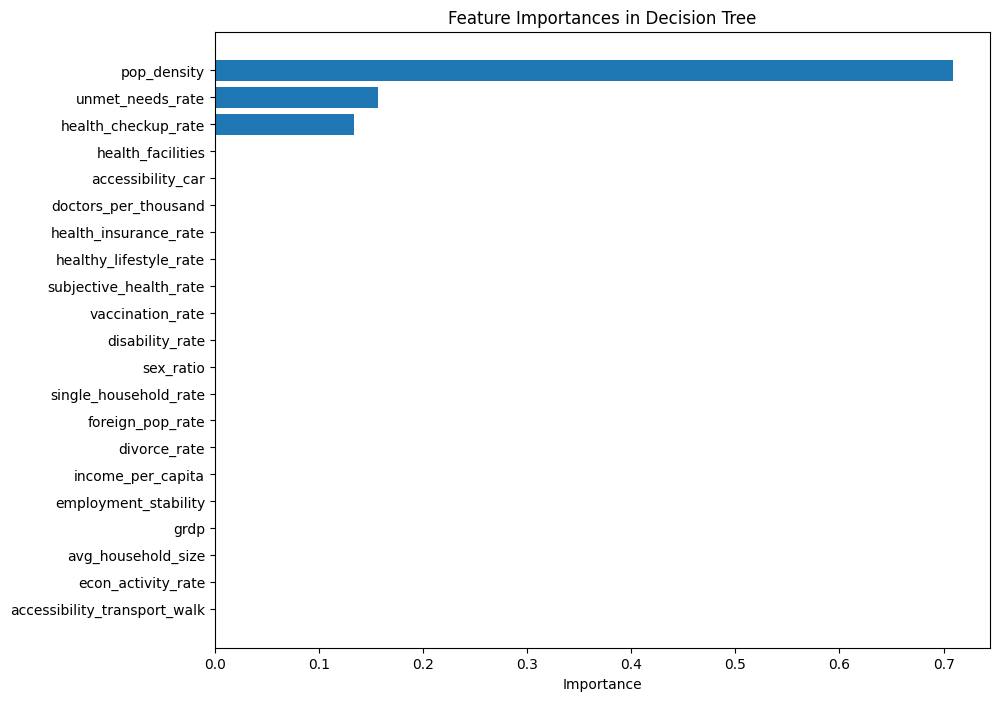

In [147]:
# 변수 중요도 시각화
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances in Decision Tree')
plt.gca().invert_yaxis()
plt.show()

#### **5.3.3. 회귀분석**

In [148]:
X_high = df_high[["pop_density", "unmet_needs_rate", "health_checkup_rate"]]
y_high = df_high["medical_performance"]

X_high_sm = sm.add_constant(X_high)
model_high = sm.OLS(y_high, X_high_sm).fit()

print(model_high.summary())

                             OLS Regression Results                            
Dep. Variable:     medical_performance   R-squared:                       0.036
Model:                             OLS   Adj. R-squared:                 -0.005
Method:                  Least Squares   F-statistic:                    0.8838
Date:                 Sat, 24 Aug 2024   Prob (F-statistic):              0.454
Time:                         13:35:04   Log-Likelihood:                -560.81
No. Observations:                   76   AIC:                             1130.
Df Residuals:                       72   BIC:                             1139.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                101

R^2 음수 -> 모델이 설명을 하지 못하는 것 / 과적합 문제